<style>
/* Enhanced background for better readability */
div {
    background: linear-gradient(to bottom, #ffffff, #e9f0f7); /* Subtle white-to-light-blue gradient */
    padding: 20px;
    border-radius: 12px;
    border: 1px solid #d1d5db; /* Soft grey border */
}

/* Title styling for better contrast */
h1 {
    color: #2d3748; /* Darker color for strong contrast */
    font-size: 1.5em; /* Make it stand out */
    margin-bottom: 15px;
}

/* Link styling for readability and emphasis */
a {
    color: #0056b3; /* Medium blue for better visibility */
    text-decoration: none;
    font-weight: bold;
}

/* Interactive hover effect for links */
a:hover {
    color: #e63946; /* Eye-catching red */
    text-decoration: underline; /* Highlight link interaction */
}

/* List items styling */
li {
    color: #2d3748; /* Dark grey for contrast */
    font-weight: normal; /* Ensure readability */
    line-height: 1.6; /* Increase spacing for clarity */
}
</style>

<div>
    <h1>Table of Content</h1>
    <ol>
        <li><a href="#1---imports">Importations  passar para utils --> lot_side_by_side_crosstabs</a></li>
        <li>Univariate Analysis
            <ul>
                <li><a href="#21---datetime">2.1 - Datetime</a></li>
                <li><a href="#22---booleans">2.2 - Booleans</a></li>
                <li><a href="#23---numericals">2.3 - Numericals</a></li>
                <li><a href="#24---categoricals">2.4 - Categoricals</a></li>
                <li><a href="#25---target">2.5 - Target</a></li>
            </ul>
        </li>
        <li>Feature Engineering
            <ul>
                <li><a href="#31---numericals">3.1 - Numericals</a></li>
                <li><a href="#32---categoricalbooleans">3.2 - Categoricals/booleans</a></li>
                <li><a href="#33---sin-cos-and-log-transformations">3.3 - Sin, cos and log transformations</a></li>
            </ul>
        </li>
    </ol>
</div>

# 1 - Imports

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from utils import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import TargetEncoder


In [225]:
df = pd.read_csv('train_data.csv')


In [226]:
n_original = df.shape
n_original

(593471, 33)

In [227]:
df = df.dropna(subset=["Claim Injury Type"]) # quase tudo nulos


In [228]:
df.duplicated().sum()


0

In [229]:
df[df.duplicated(keep=False)]


Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 33 columns]

In [230]:
df.drop_duplicates(inplace=True)


In [231]:
n_original[0] - df.shape[0]

19445

In [232]:
df = df.set_index("Claim Identifier")

df[df.index.duplicated(keep=False)]
# df.shape
# # 20 duplicados

# df = df[~df.index.duplicated(keep='first')]
# df.shape

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 32 columns]

# 2 - Univariate analysis

## 2.1 - Datetime

In [233]:
for feat in df.columns:
    if "Date" in feat:
        df[feat] = pd.to_datetime(df[feat], format="%Y-%m-%d")
date_feats = [feat for feat in df.columns if "Date" in feat]

date_feats.append("Birth Year")

### Birth year

In [234]:
#Outliers
df["Birth Year"] = np.where(df["Birth Year"] == 0, df["Accident Date"].dt.year - df["Age at Injury"], df["Birth Year"])
df["Birth Year"] = pd.to_datetime(df["Birth Year"], format="%Y")
df["Birth Year"].min()


Timestamp('1900-01-01 00:00:00')

### Other Datetimes

In [235]:
df[date_feats].describe().T

count                           mean  \
Accident Date       570337  2021-04-28 21:00:27.892983296   
Assembly Date       574026  2021-07-19 19:01:36.894565888   
C-2 Date            559466  2021-07-16 20:11:19.865442816   
C-3 Date            187245  2021-07-26 21:31:28.449892096   
First Hearing Date  150798  2022-03-19 05:07:38.218278912   
Birth Year          544620  1977-11-30 10:26:10.880246816   

                                    min                  25%  \
Accident Date       1961-09-06 00:00:00  2020-09-14 00:00:00   
Assembly Date       2020-01-01 00:00:00  2020-10-27 00:00:00   
C-2 Date            1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date            1992-11-13 00:00:00  2020-10-27 00:00:00   
First Hearing Date  2020-01-30 00:00:00  2021-06-01 00:00:00   
Birth Year          1900-01-01 00:00:00  1967-01-01 00:00:00   

                                    50%                  75%  \
Accident Date       2021-06-27 00:00:00  2022-03-21 00:00:00   
Assembly Date       2021-07-30 00:00:00  2022-04-19 00:00:00   
C-2 Date            2021-08-09 00:00:00  2022-04-26 00:00:00   
C-3 Date            2021-07-21 00:00:00  2022-04-20 00:00:00   
First Hearing Date  2022-03-09 00:00:00  2023-01-11 00:00:00   
Birth Year          1978-01-01 00:00:00  1990-01-01 00:00:00   

                                    max  
Accident Date       2023-09-29 00:00:00  
Assembly Date       2022-12-31 00:00:00  
C-2 Date            2024-06-01 00:00:00  
C-3 Date            2024-05-31 00:00:00  
First Hearing Date  2024-06-07 00:00:00  
Birth Year          2022-01-01 00:00:00

In [236]:
# 8 colors for target variables
colors_8 = ['#468B79', '#CF7842', '#827EB3', '#D9658D','#6BA656', '#D4AF4F', '#A9855A', '#808080']
colors_3 = ['#468B79',  # Dark teal
          '#CF7842',  # Dark orange
          '#827EB3']  # Dark purple
colors_4 = ['#468B79', '#CF7842', '#827EB3', '#D9658D']
colors_7 = ['#468B79', '#CF7842', '#827EB3', '#D9658D','#6BA656', '#D4AF4F','#A9855A']
colors_2 = ['#468B79', '#CF7842']
colors_1 = ["#468B79"]
colors_5 = ['#468B79', '#CF7842', '#827EB3', '#D9658D','#6BA656']
colors_10 =['#468B79',  # Teal
          '#CF7842',  # Orange
          '#827EB3',  # Purple
          '#D9658D',  # Pink
          '#6BA656',  # Green
          '#D4AF4F',  # Yellow-orange
          '#A9855A',  # Brown
          '#808080',  # Gray
          '#5C6BC0',  # Indigo (new)
          '#F06292']
colors_6 = ['#468B79', '#CF7842', '#827EB3', '#D9658D','#6BA656', '#D4AF4F']

## 2.2 - Booleans

### Alternative Dispute Resolution

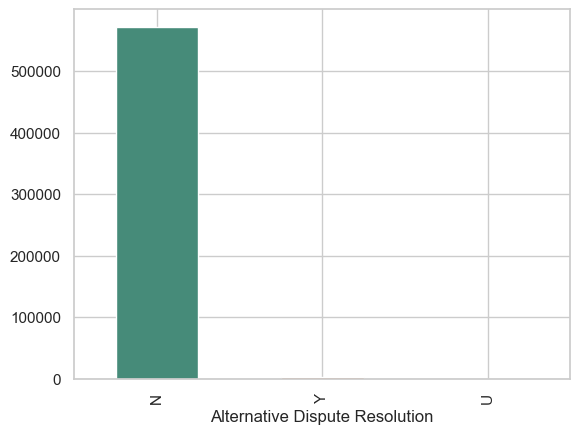

In [237]:
df["Alternative Dispute Resolution"].value_counts().plot(kind="bar", color=colors_3)
plt.show()

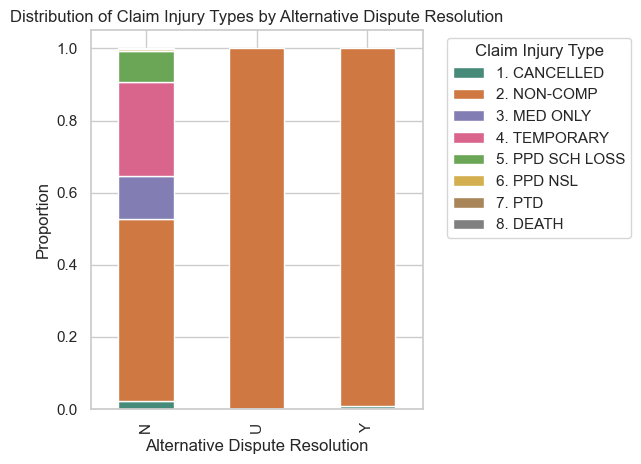

In [238]:
cat1 = "Alternative Dispute Resolution"
cat2 = "Claim Injury Type"
catpc_df1 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()  

catpc_df1.unstack().plot(kind='bar', stacked=True,color= colors_8)
plt.title("Distribution of Claim Injury Types by Alternative Dispute Resolution")
plt.ylabel("Proportion")
plt.xlabel("Alternative Dispute Resolution")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [239]:
df["Alternative Dispute Resolution"] = np.where(df["Alternative Dispute Resolution"] == "U", "Y", df["Alternative Dispute Resolution"])

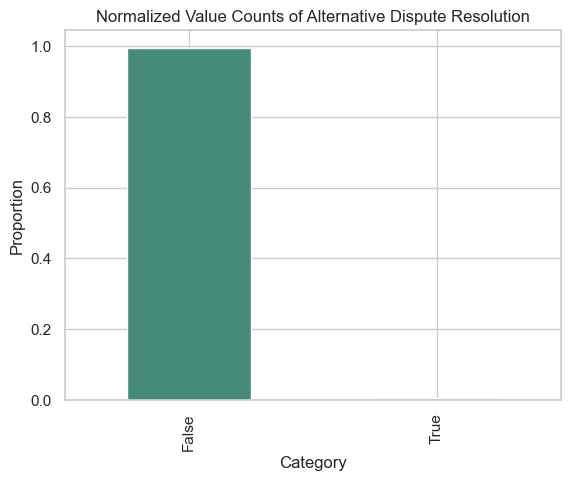

In [240]:
df["Alternative Dispute Resolution"] = df["Alternative Dispute Resolution"].map({"Y": True, "N": False})

# Plot the normalized value counts with matching colors
df["Alternative Dispute Resolution"].value_counts(normalize=True).plot(kind="bar", color=colors_2)
plt.title("Normalized Value Counts of Alternative Dispute Resolution")
plt.ylabel("Proportion")
plt.xlabel("Category")
plt.show()
plt.show()

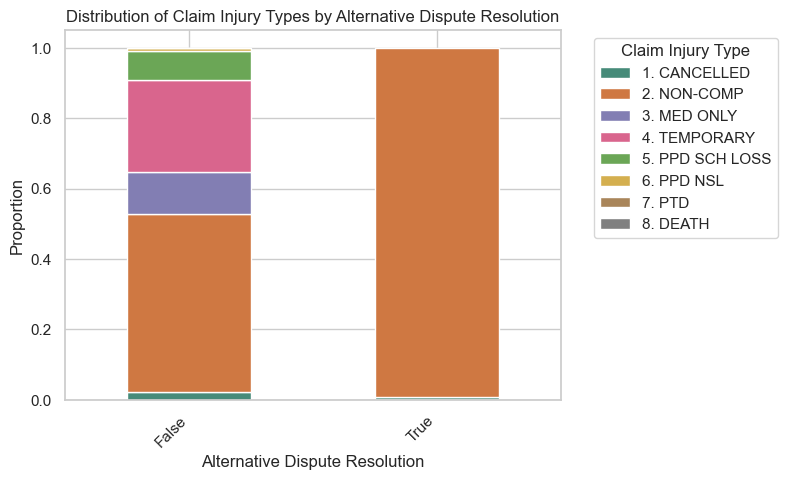

In [241]:
pd.crosstab(df["Alternative Dispute Resolution"], df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of Claim Injury Types by Alternative Dispute Resolution")
plt.ylabel("Proportion")
plt.xlabel("Alternative Dispute Resolution")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


### Attorney/Representative

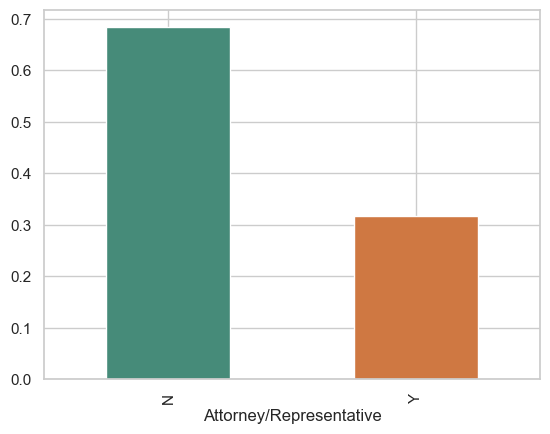

In [242]:
df["Attorney/Representative"].value_counts(normalize=True).plot(kind="bar",color = colors_2)
plt.show()

In [243]:
df["Attorney/Representative"] = df["Attorney/Representative"].map({"Y": True, "N": False})

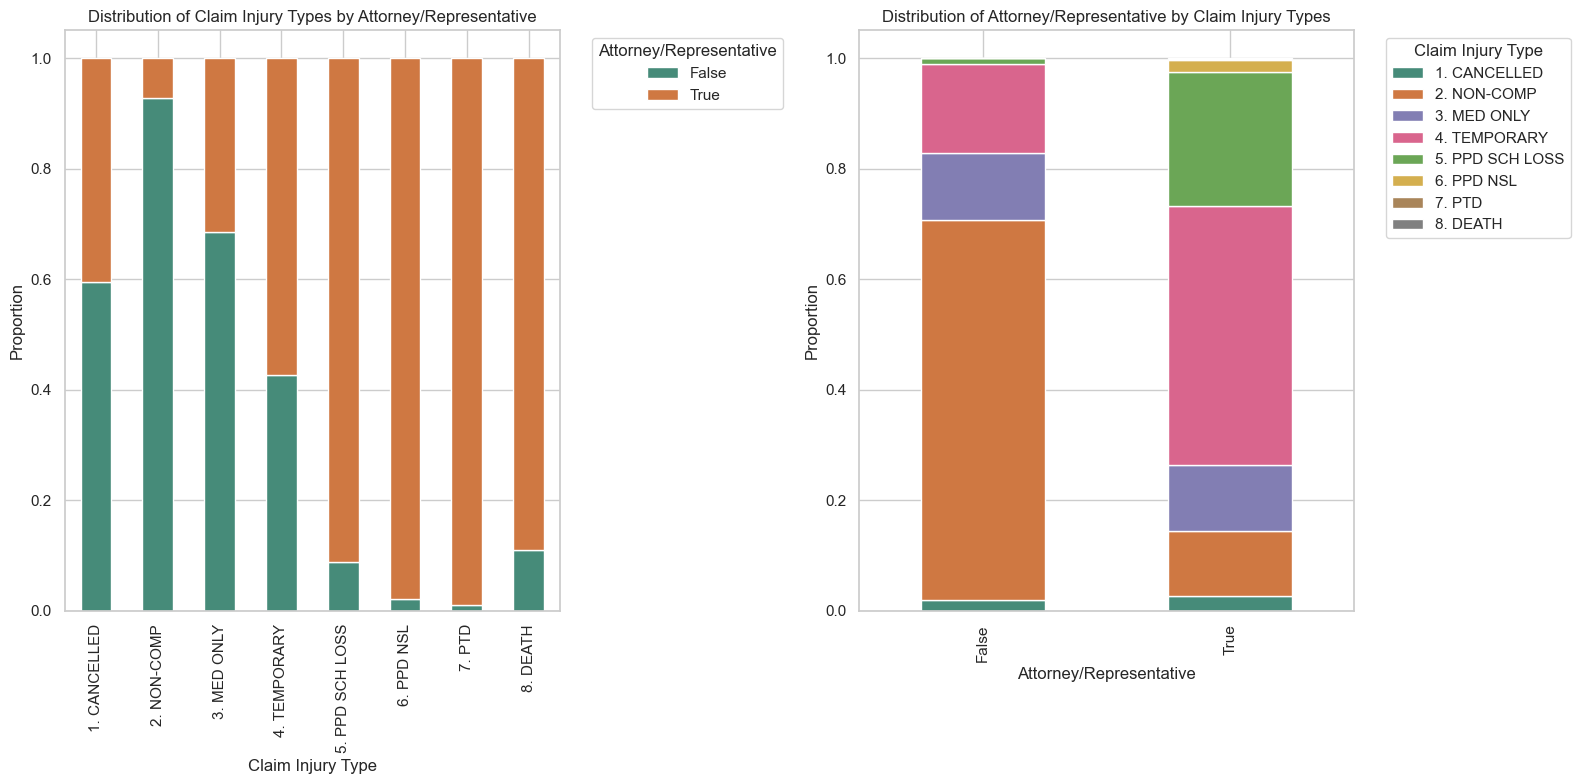

In [244]:
cat1 = "Claim Injury Type"
cat2 = "Attorney/Representative"
catpc_df1 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2 = df.groupby([cat2, cat1])[cat1].size() / df.groupby([cat2])[cat1].size()
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
catpc_df1.unstack().plot.bar(stacked=True, ax=axes[0],color=colors_2)
axes[0].set_title("Distribution of Claim Injury Types by Attorney/Representative")
axes[0].set_ylabel("Proportion")
axes[0].set_xlabel("Claim Injury Type")
axes[0].legend(title="Attorney/Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1],color=colors_8)
axes[1].set_title("Distribution of Attorney/Representative by Claim Injury Types")
axes[1].set_ylabel("Proportion")
axes[1].set_xlabel("Attorney/Representative")
axes[1].legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### COVID-19 Indicator

In [245]:
df["COVID-19 Indicator"] = df["COVID-19 Indicator"].map({"Y": True, "N": False})

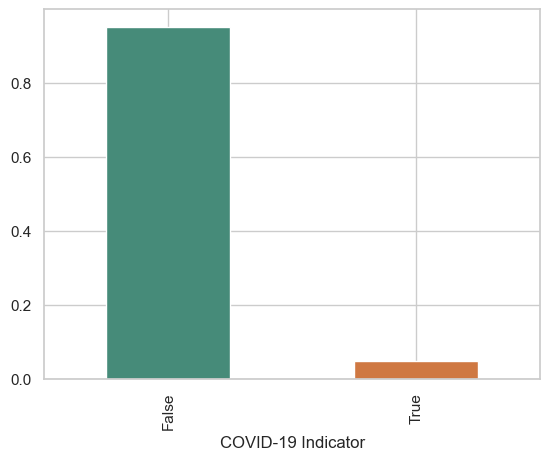

In [246]:
df["COVID-19 Indicator"].value_counts(normalize=True).plot(kind="bar",color = colors_2)
plt.show()

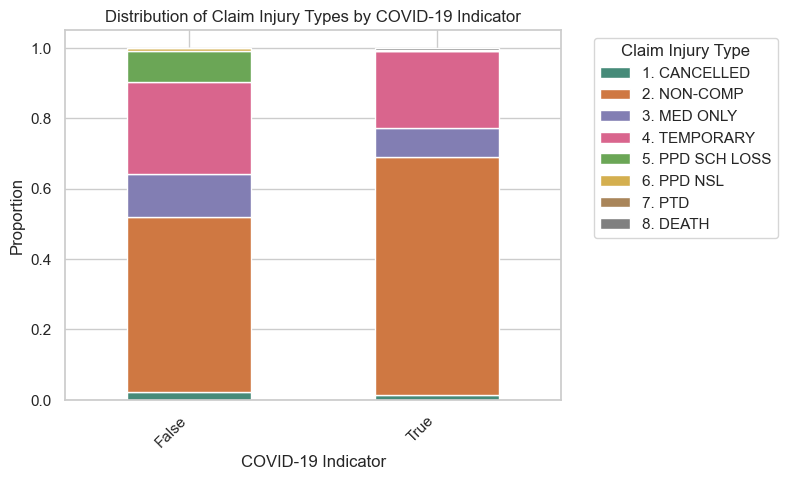

In [247]:
pd.crosstab(df["COVID-19 Indicator"], df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True, color = colors_8)
plt.title("Distribution of Claim Injury Types by COVID-19 Indicator")
plt.ylabel("Proportion")
plt.xlabel("COVID-19 Indicator")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

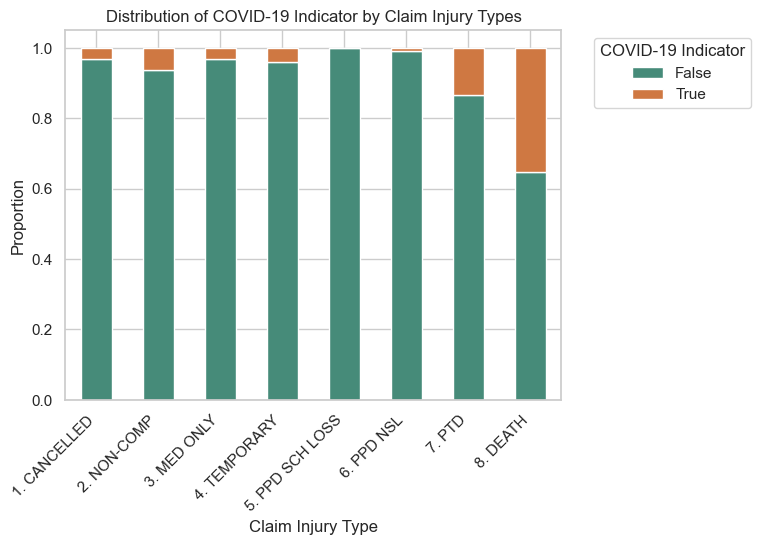

In [248]:
pd.crosstab(df["Claim Injury Type"], df["COVID-19 Indicator"], normalize="index").plot(kind="bar", stacked=True,color=colors_2)
plt.title("Distribution of COVID-19 Indicator by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="COVID-19 Indicator", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

## 2.3 - Numericals

In [249]:
#df.describe().T
numerical_features = ['IME-4 Count', 'Age at Injury', 'Average Weekly Wage', 'Number of Dependents']

### Age at Injury

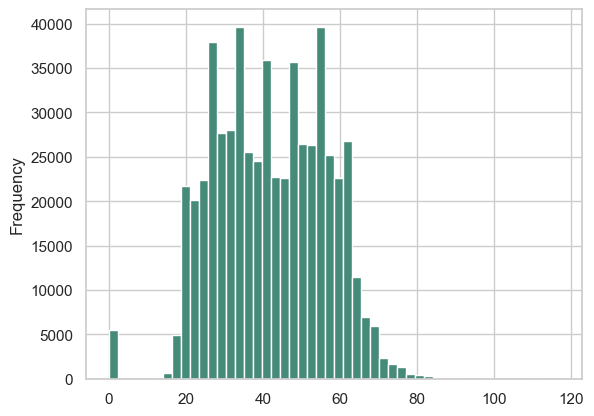

In [250]:
df["Age at Injury"].plot(kind="hist", bins=50,color=colors_1)
plt.show()

In [251]:
df[df["Age at Injury"] >90]["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        137
1. CANCELLED        10
4. TEMPORARY        10
3. MED ONLY          6
5. PPD SCH LOSS      3
Name: count, dtype: int64

In [252]:
df["Age at Injury"] = np.where(df["Age at Injury"] > 90, 90, df["Age at Injury"])

In [253]:
df["Age at Injury"] = np.where(df["Age at Injury"] == 0, df["Accident Date"].dt.year - df["Birth Year"].dt.year, df["Age at Injury"])

In [254]:
df["Birth Year"] = np.where(df["Birth Year"].isna() & ~(df["Accident Date"].isna()), pd.to_datetime(df["Accident Date"].dt.year - df["Age at Injury"], format="%Y"), df["Birth Year"])

In [255]:
df["Age at Injury"] = np.where(df["Age at Injury"] == 0, df["Accident Date"].dt.year - df["Birth Year"].dt.year, df["Age at Injury"])

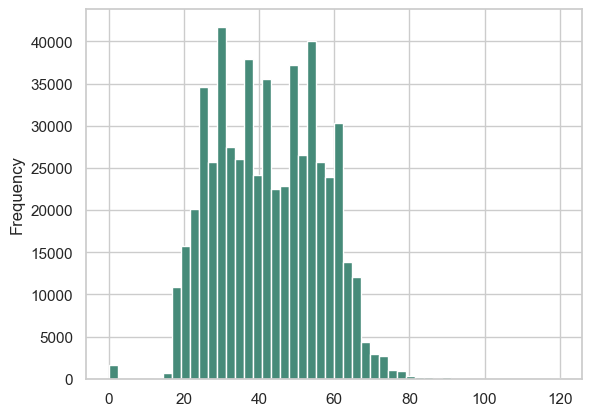

In [256]:
df["Age at Injury"].plot(kind="hist", bins=50,color=colors_1)
plt.show()

In [257]:
df["Age at Injury"].mean()
ex = df.copy()
ex["Age at Injury"] = np.where(ex["Age at Injury"] > 70, 70, ex["Age at Injury"])
ex["Age at Injury"].mean()

42.338453283016484

In [258]:
df[df["Age at Injury"] < 14]["Claim Injury Type"].value_counts()

df["Age at Injury"] = np.where(df["Age at Injury"] < 14, np.nan, df["Age at Injury"])

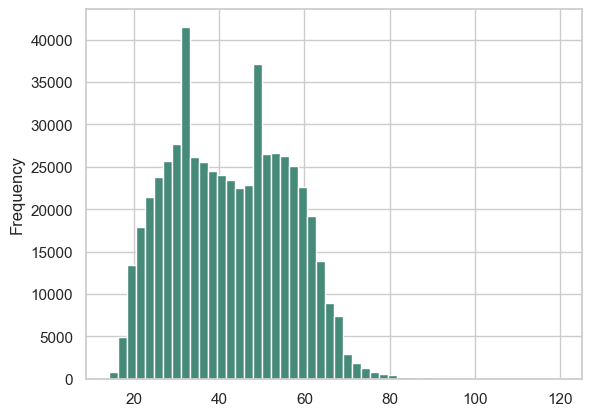

In [259]:
df["Age at Injury"].describe()
df["Age at Injury"].plot(kind="hist", bins=50,color=colors_1)
plt.show()

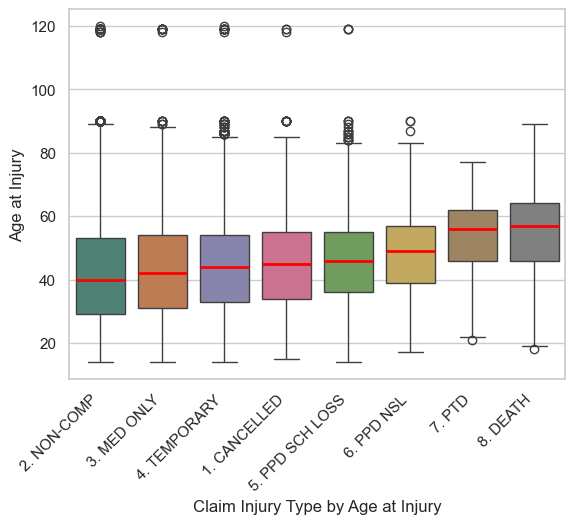

count    568608.000000
mean         42.531106
std          13.729670
min          14.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         120.000000
Name: Age at Injury, dtype: float64

In [260]:
plot_numerical_vs_target(df, "Age at Injury", "Claim Injury Type")
df["Age at Injury"].describe()

### IME-4 Count

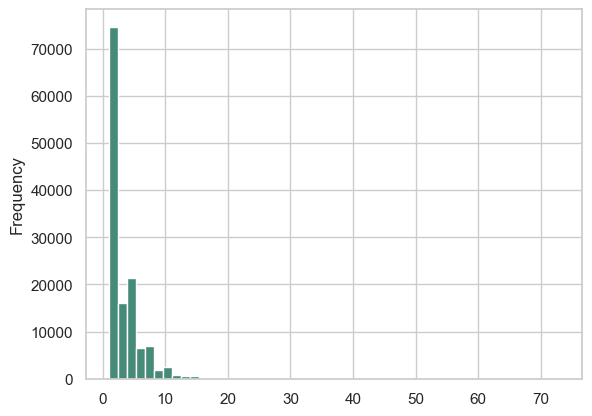

In [261]:
df["IME-4 Count"].describe()
df["IME-4 Count"].plot(kind="hist", bins=50,color = colors_1)
plt.show()

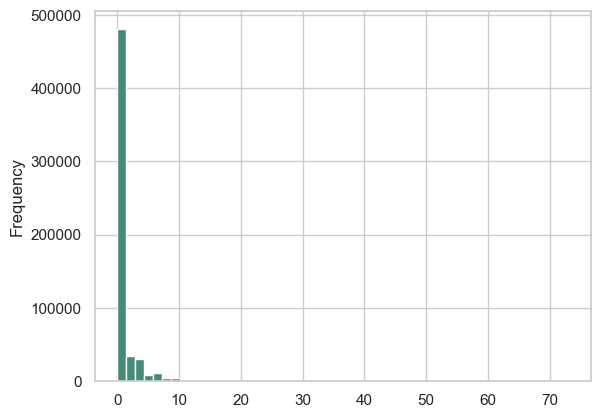

In [262]:
# MISSING
df["IME-4 Count"] = np.where(df["IME-4 Count"].isna(), 0, df["IME-4 Count"])
df["IME-4 Count"].plot(kind="hist", bins=50,color =colors_1)
plt.show()

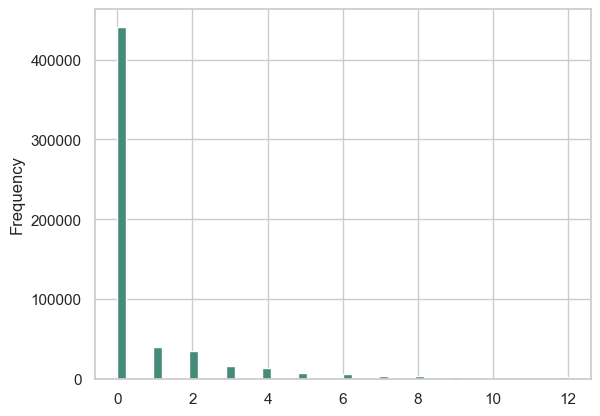

count    574026.000000
mean          0.728345
std           1.808360
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: IME-4 Count, dtype: float64

In [263]:
df["IME-4 Count"] = np.where(df["IME-4 Count"] > 12, 12, df["IME-4 Count"])
df["IME-4 Count"].plot(kind="hist", bins=50,color =colors_1)
plt.show()
df["IME-4 Count"].describe()

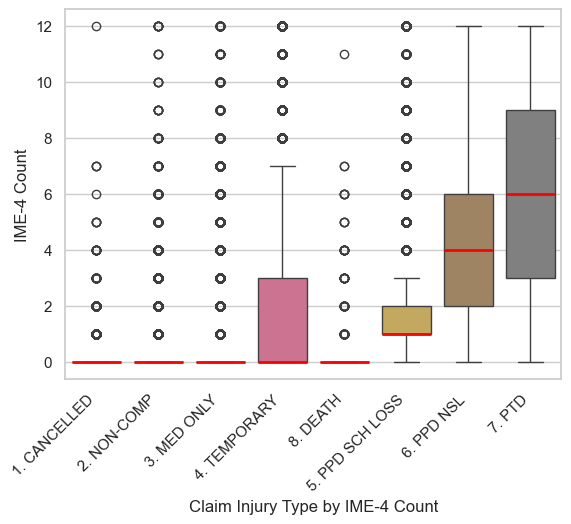

In [264]:
plot_numerical_vs_target(df, "IME-4 Count", "Claim Injury Type")

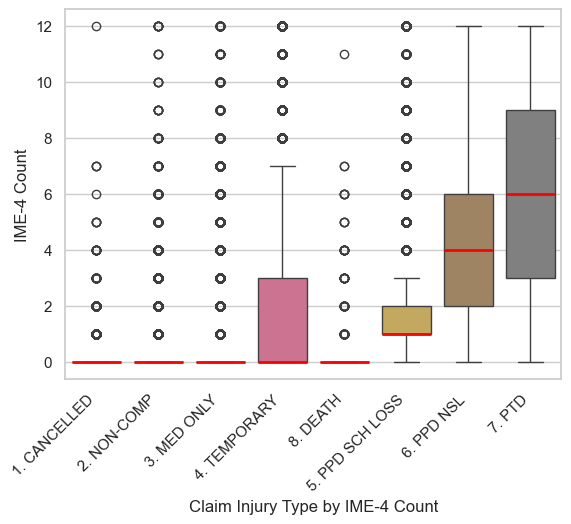

0

In [265]:
plot_numerical_vs_target(df, "IME-4 Count", "Claim Injury Type")
df["IME-4 Count"].isna().sum() # 0

### Number of Dependents

In [266]:
df["Number of Dependents"].describe()

count    574026.000000
mean          3.006559
std           2.000801
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Number of Dependents, dtype: float64

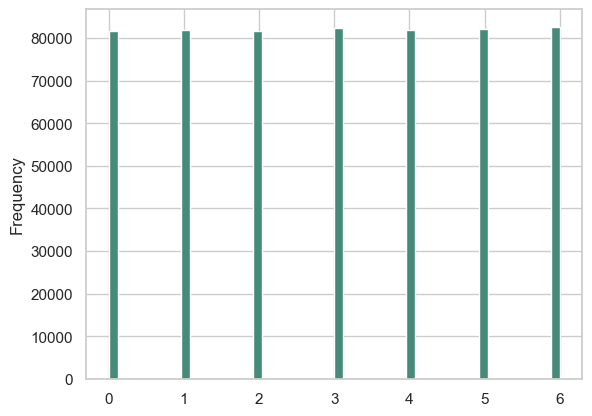

In [267]:
df["Number of Dependents"].plot(kind="hist", bins=50,color = colors_7)
plt.show()

In [268]:
df["Number of Dependents"].value_counts()

Number of Dependents
6.0    82653
3.0    82299
5.0    82075
4.0    81904
1.0    81823
0.0    81665
2.0    81607
Name: count, dtype: int64

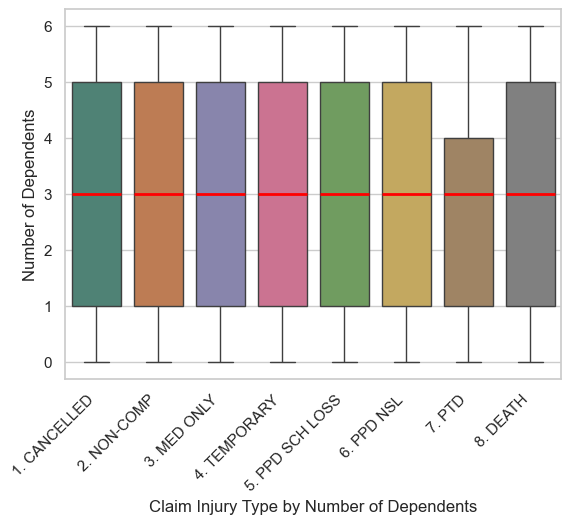

In [269]:
plot_numerical_vs_target(df,"Number of Dependents","Claim Injury Type")

In [270]:
df["Number of Dependents"].isna().sum() # 0

0

### Average Weekly Wage

In [271]:
df["Average Weekly Wage"].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

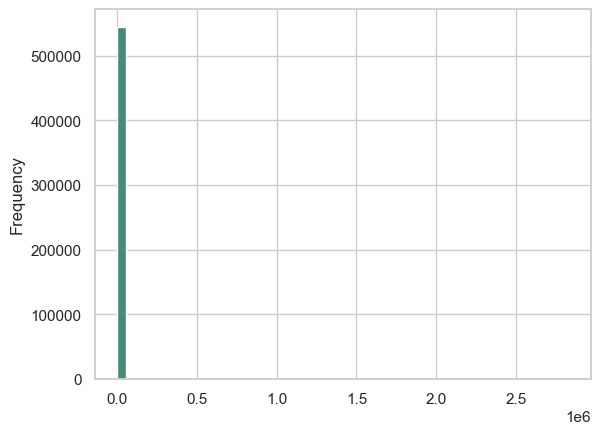

In [272]:
df["Average Weekly Wage"].plot(kind="hist", bins=50,color = colors_1)
plt.show()

## 2.4 - Categoricals

### Gender

In [273]:
df["Gender"].value_counts()
# > 30 - the sample mean approximates de population mean

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

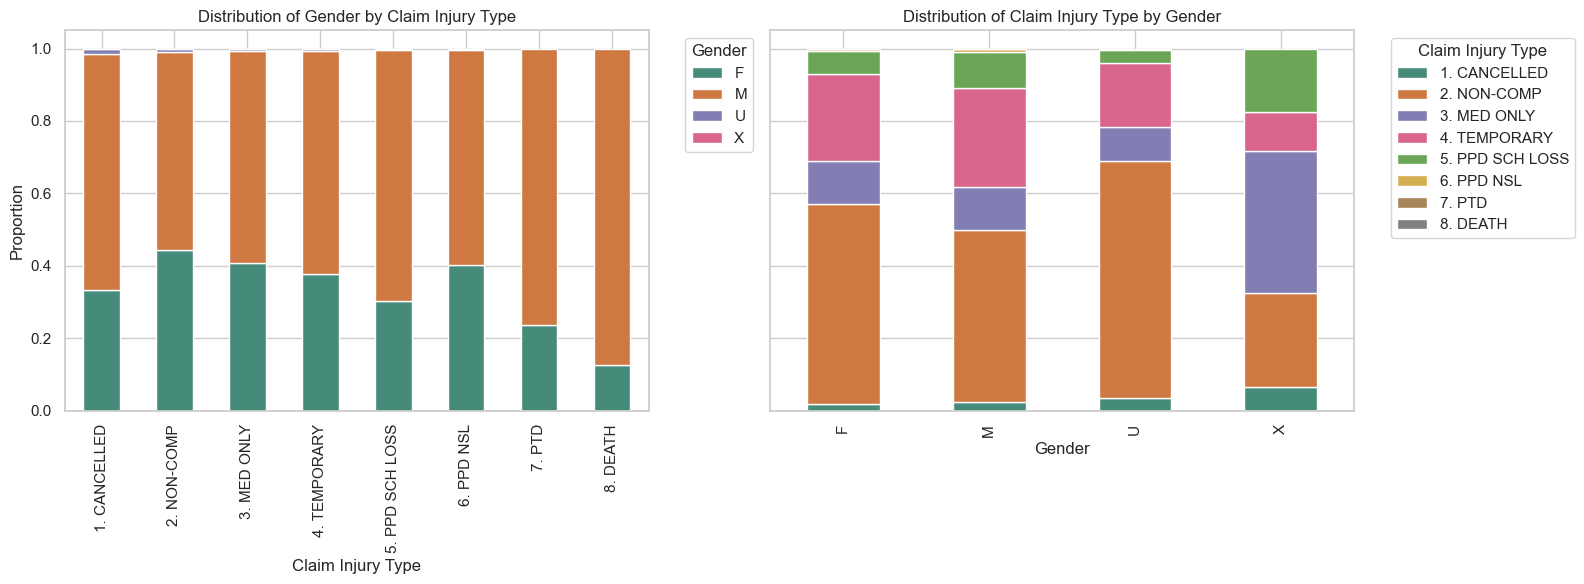

In [274]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Gender")

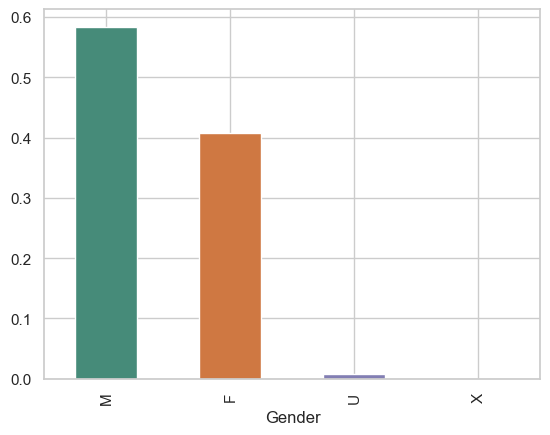

In [275]:
df["Gender"].value_counts(normalize=True).plot(kind="bar",color=colors_4)
plt.show()

### Carrier Name

In [276]:
df["Carrier Name"].nunique() # 2_046

2046

In [277]:
(df["Carrier Name"].value_counts() < 30).sum()  # 1_194

1194

In [278]:
underrepresented_carrier = df["Carrier Name"].value_counts()[df["Carrier Name"].value_counts() < 30].index
len(underrepresented_carrier)

1194

In [279]:
df["Carrier Name"] = np.where(df["Carrier Name"].isin(underrepresented_carrier), "Other", df["Carrier Name"])

In [280]:
top_10 = df["Carrier Name"].value_counts().nlargest(10).index

top_10 = df[df["Carrier Name"].isin(top_10)]

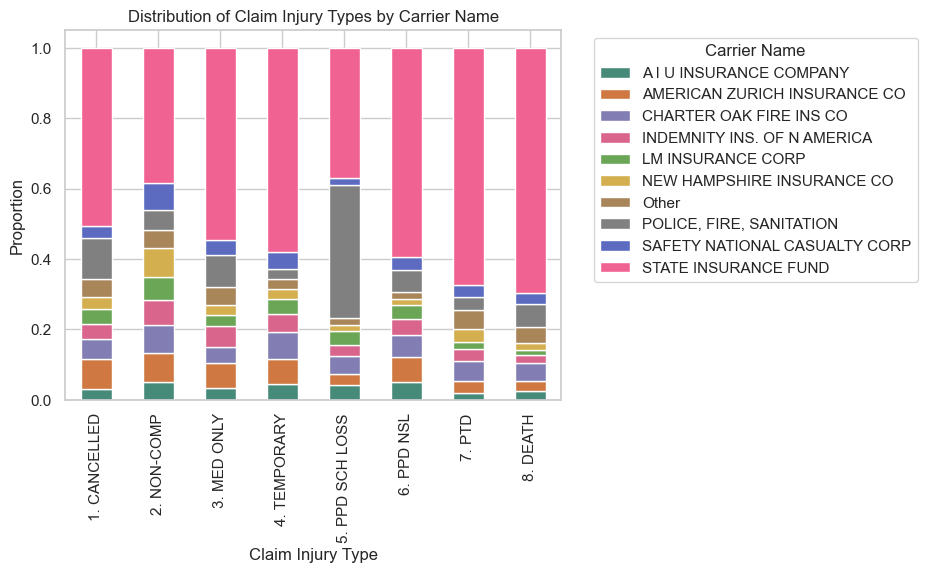

In [281]:
pd.crosstab(top_10["Claim Injury Type"], top_10["Carrier Name"], normalize="index").plot(kind="bar", stacked=True,color= colors_10)
plt.title("Distribution of Claim Injury Types by Carrier Name")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="Carrier Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

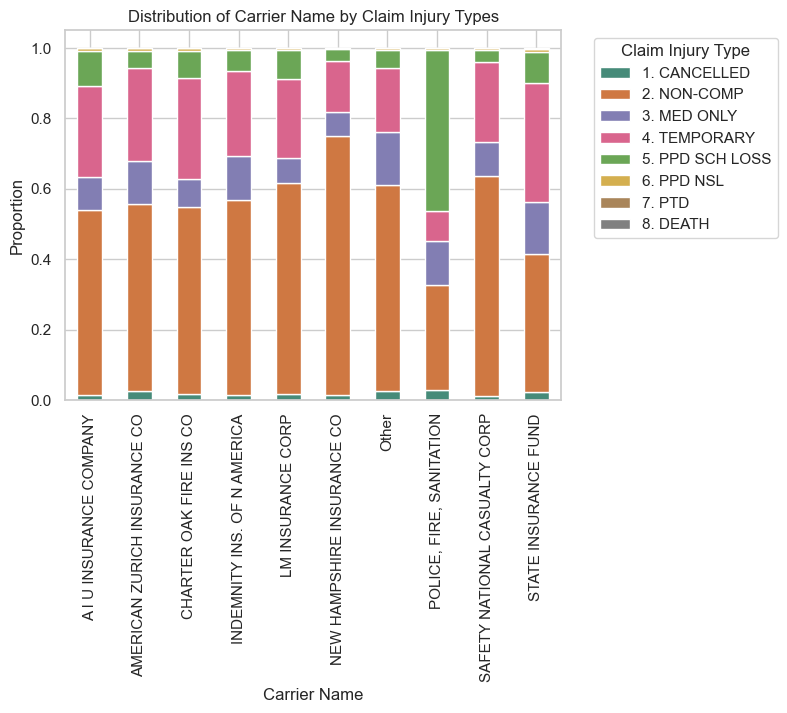

In [282]:
pd.crosstab(top_10["Carrier Name"], top_10["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of Carrier Name by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("Carrier Name")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [283]:
df["Carrier Name"].isna().sum() # 0

0

In [284]:
df["Carrier Name"].nunique()

853

### Carrier Type

In [285]:
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

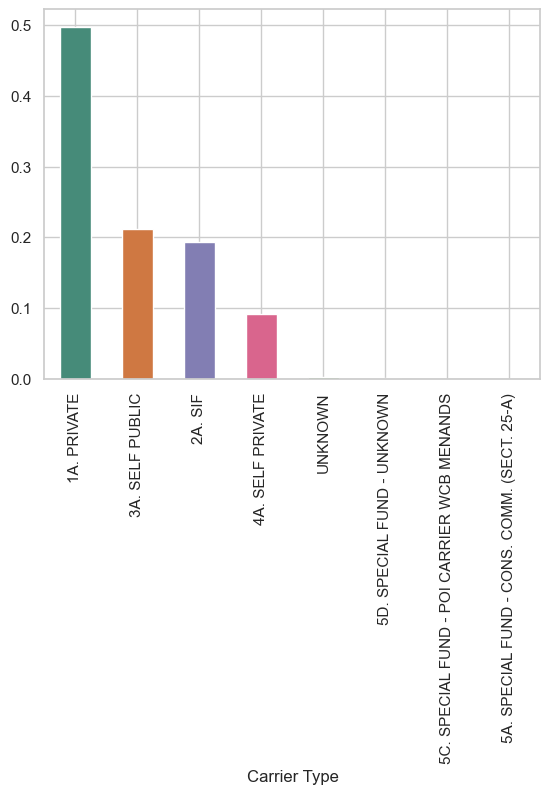

Index(['5C. SPECIAL FUND - POI CARRIER WCB MENANDS', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'], dtype='object', name='Carrier Type')

In [286]:
df["Carrier Type"].value_counts(normalize=True).plot(kind="bar",color=colors_8)
plt.show()
df["Carrier Type"].value_counts()
underrepresented_carrier = df["Carrier Type"].value_counts()[df["Carrier Type"].value_counts() < 30].index
len(underrepresented_carrier)
underrepresented_carrier

In [287]:
df["Carrier Type"] = np.where(df["Carrier Type"].isin(underrepresented_carrier), "Other", df["Carrier Type"])

In [288]:
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                   285368
3A. SELF PUBLIC               121920
2A. SIF                       111144
4A. SELF PRIVATE               52788
UNKNOWN                         1774
5D. SPECIAL FUND - UNKNOWN      1023
Other                              9
Name: count, dtype: int64

In [289]:
df["Carrier Type"] = np.where(df["Carrier Type"] == "Other", "5D. SPECIAL FUND - UNKNOWN", df["Carrier Type"])
df["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                   285368
3A. SELF PUBLIC               121920
2A. SIF                       111144
4A. SELF PRIVATE               52788
UNKNOWN                         1774
5D. SPECIAL FUND - UNKNOWN      1032
Name: count, dtype: int64

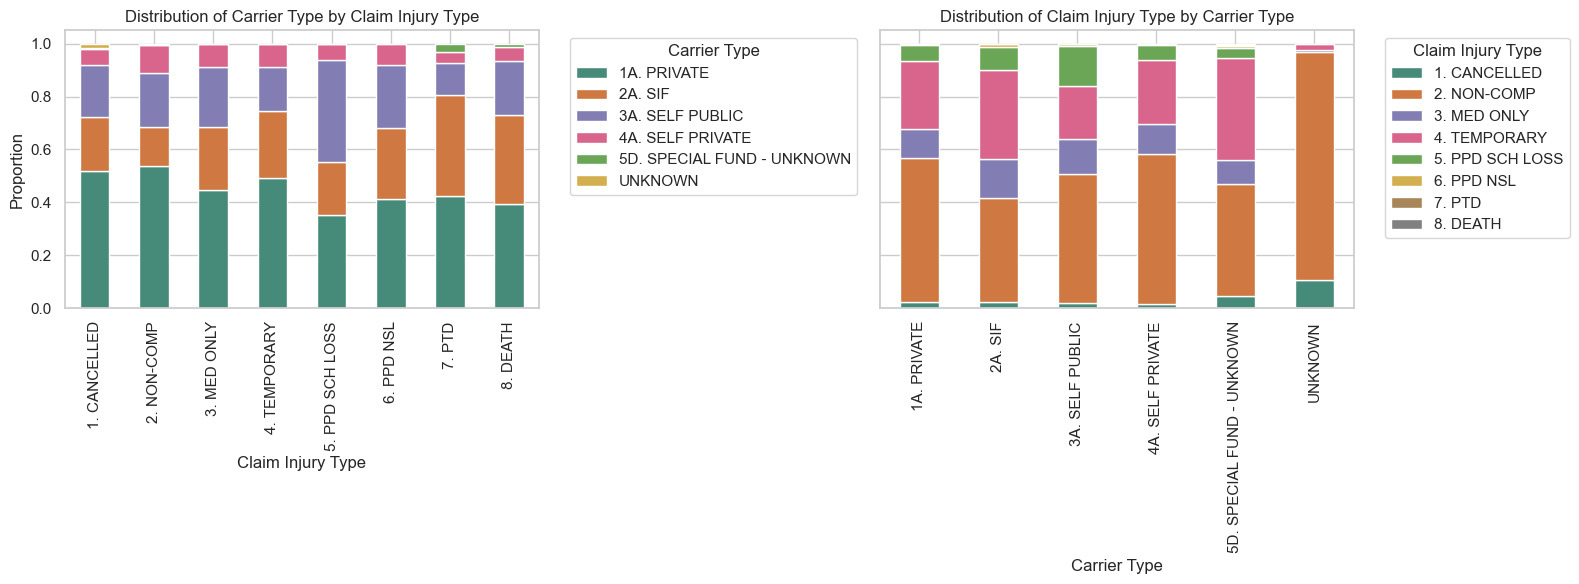

In [290]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Carrier Type")

### Industry Code Description

In [291]:
df["Industry Code Description"].nunique() # 20

20

In [292]:
df["Industry Code Description"].value_counts() # > 30

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMATION                                        

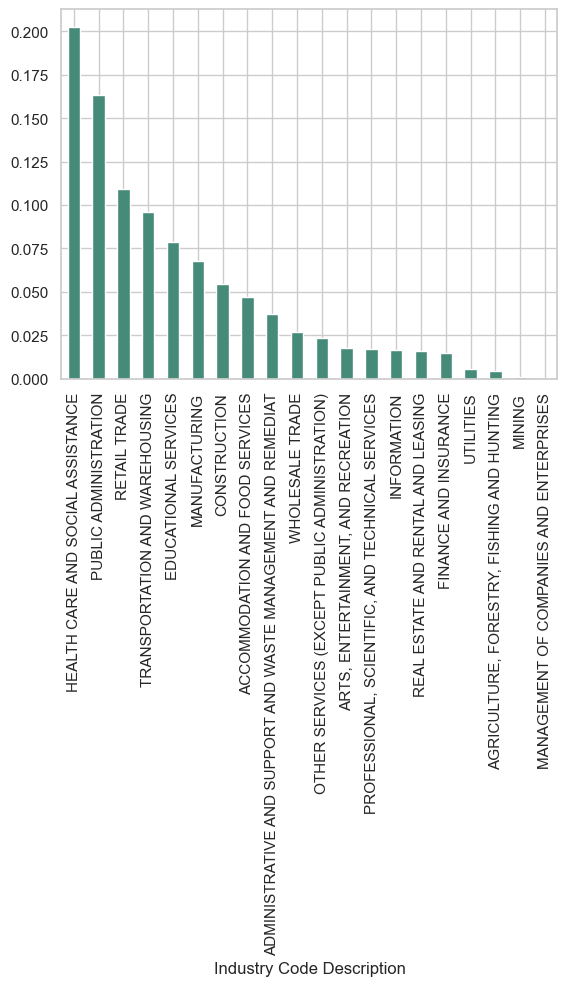

In [293]:
df["Industry Code Description"].value_counts(normalize=True).plot(kind="bar",color=colors_1)
plt.show()

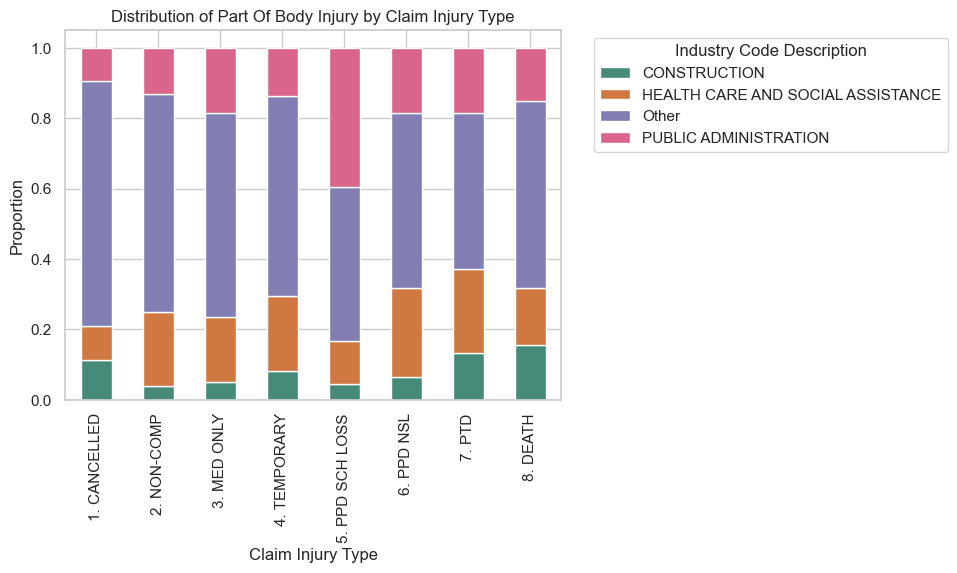

In [294]:
top_parts = df.groupby("Claim Injury Type")["Industry Code Description"].apply(lambda x: x.value_counts(normalize=True).nlargest(1))
top_parts = top_parts.reset_index(name="Proportion")
top_parts = top_parts.level_1.unique()
img_df = df.copy()
img_df["Industry Code Description"] = np.where(img_df["Industry Code Description"].isin(top_parts), img_df["Industry Code Description"], "Other")
img_df.groupby("Claim Injury Type")["Industry Code Description"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color = colors_4)
plt.title("Distribution of Part Of Body Injury by Claim Injury Type")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="Industry Code Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

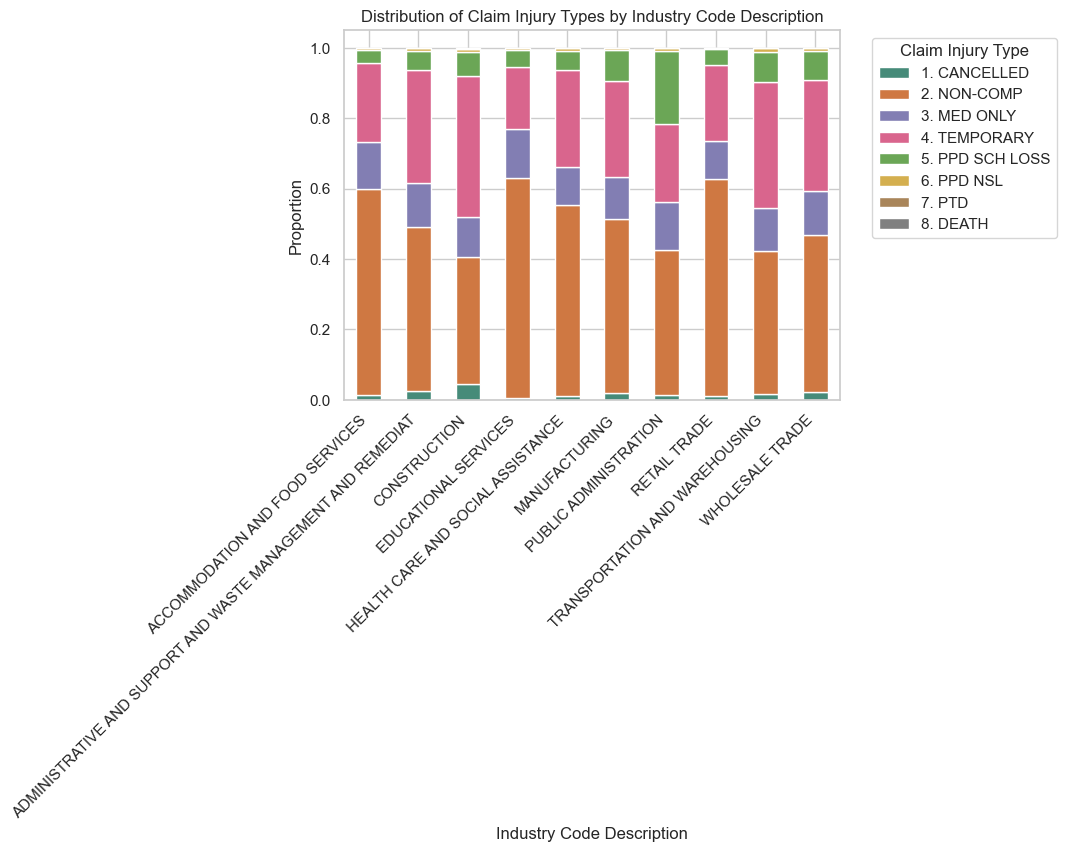

In [295]:
top_10_list = df["Industry Code Description"].value_counts().nlargest(10).index.tolist()
cat2 = "Claim Injury Type"
cat1 = "Industry Code Description"
catpc_df1 = df[df["Industry Code Description"].isin(top_10_list)].groupby([cat1, cat2])[cat2].size() / df[df["Industry Code Description"].isin(top_10_list)].groupby([cat1])[cat2].size()
catpc_df1.unstack().plot.bar(stacked=True,color=colors_8)
plt.title("Distribution of Claim Injury Types by Industry Code Description")
plt.ylabel("Proportion")
plt.xlabel("Industry Code Description")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [296]:
df["Industry Code Description"].isna().sum() # 9958

9958

In [297]:
# MISSING
df["Industry Code Description"] = np.where(df["Industry Code Description"].isna(), "Missing", df["Industry Code Description"])

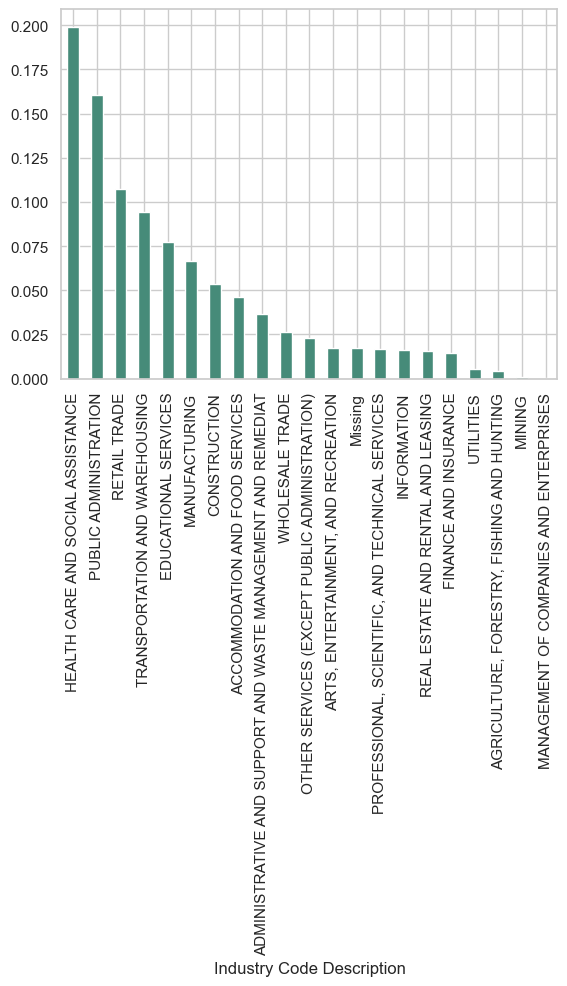

In [298]:
df["Industry Code Description"].value_counts(normalize=True).plot(kind="bar",color = colors_1)
plt.show()

### WCIO Cause of Injury Description

In [299]:
df["WCIO Cause of Injury Description"].value_counts()
# while 12 theres only one category with < 30 -- crash plane

WCIO Cause of Injury Description
LIFTING                                   46610
FELLOW WORKER, PATIENT OR OTHER PERSON    37153
STRAIN OR INJURY BY, NOC                  33192
FALL, SLIP OR TRIP, NOC                   31733
ON SAME LEVEL                             29364
                                          ...  
MOLD                                         55
ABNORMAL AIR PRESSURE                        51
CRASH OF WATER VEHICLE                       45
RADIATION                                    34
CRASH OF AIRPLANE                            12
Name: count, Length: 74, dtype: int64

In [300]:
df["WCIO Cause of Injury Description"] = np.where(df["WCIO Cause of Injury Description"] == "CRASH OF AIRPLANE", np.nan, df["WCIO Cause of Injury Description"])

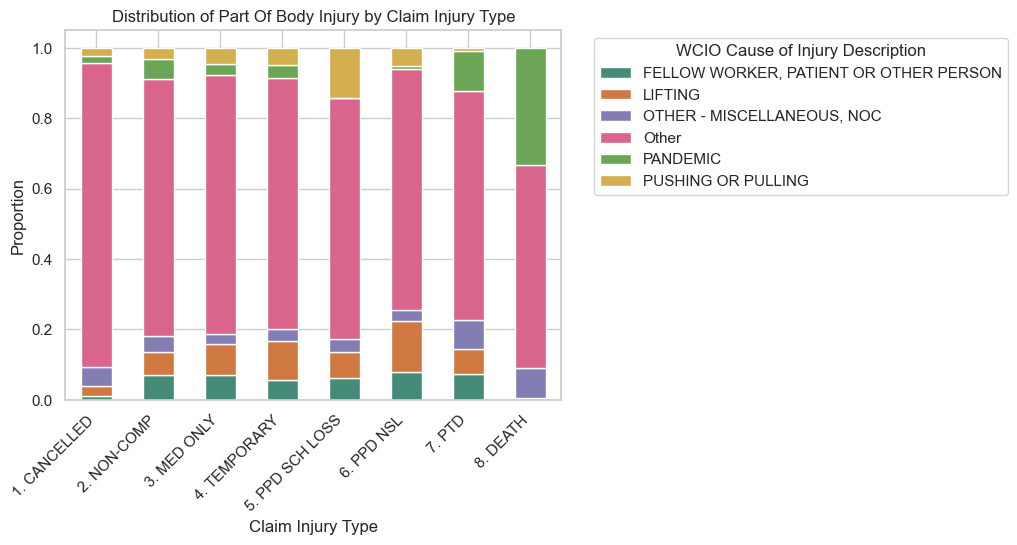

In [301]:
top_parts = df.groupby("Claim Injury Type")["WCIO Cause of Injury Description"].apply(lambda x: x.value_counts(normalize=True).nlargest(1))
top_parts = top_parts.reset_index(name="Proportion")
top_parts = top_parts.level_1.unique()
img_df = df.copy()
img_df["WCIO Cause of Injury Description"] = np.where(img_df["WCIO Cause of Injury Description"].isin(top_parts), img_df["WCIO Cause of Injury Description"], "Other")
img_df.groupby("Claim Injury Type")["WCIO Cause of Injury Description"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color = colors_6)
plt.title("Distribution of Part Of Body Injury by Claim Injury Type")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="WCIO Cause of Injury Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

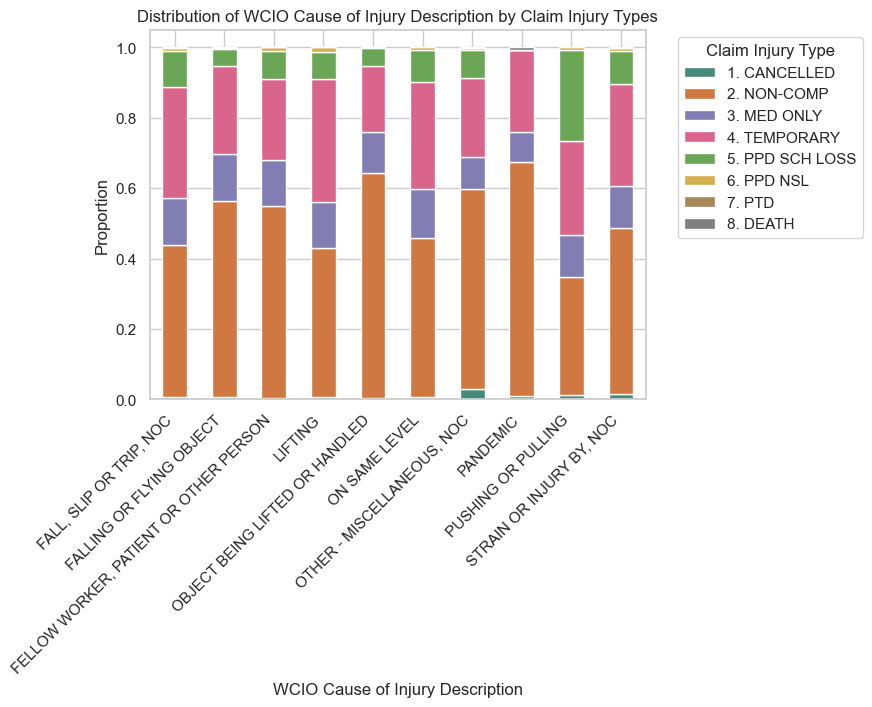

In [302]:
top10 = df["WCIO Cause of Injury Description"].value_counts().nlargest(10).index.tolist()
top10_df = df[df["WCIO Cause of Injury Description"].isin(top10)]
pd.crosstab(top10_df["WCIO Cause of Injury Description"], top10_df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of WCIO Cause of Injury Description by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("WCIO Cause of Injury Description")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [303]:
# MISSING
df["WCIO Cause of Injury Description"].isna().sum() # 15_640

15652

In [304]:
# IMPUTACAO COM "MISSING"
df["WCIO Cause of Injury Description"] = np.where(df["WCIO Cause of Injury Description"].isna(), "Missing", df["WCIO Cause of Injury Description"])

In [305]:
df["WCIO Cause of Injury Description"].value_counts()

WCIO Cause of Injury Description
LIFTING                                   46610
FELLOW WORKER, PATIENT OR OTHER PERSON    37153
STRAIN OR INJURY BY, NOC                  33192
FALL, SLIP OR TRIP, NOC                   31733
ON SAME LEVEL                             29364
                                          ...  
WELDING OPERATION                            81
MOLD                                         55
ABNORMAL AIR PRESSURE                        51
CRASH OF WATER VEHICLE                       45
RADIATION                                    34
Name: count, Length: 74, dtype: int64

In [306]:
df[df["WCIO Cause of Injury Description"].isna()]["Claim Injury Type"].value_counts()

Series([], Name: count, dtype: int64)

### WCIO Nature of Injury Description

In [307]:
df["WCIO Nature of Injury Description"].value_counts() # 8 under 30

WCIO Nature of Injury Description
STRAIN OR TEAR                                                 153373
CONTUSION                                                      110717
SPRAIN OR TEAR                                                  55789
LACERATION                                                      47157
ALL OTHER SPECIFIC INJURIES, NOC                                36101
COVID-19                                                        25724
FRACTURE                                                        22673
PUNCTURE                                                        17350
MULTIPLE PHYSICAL INJURIES ONLY                                 12734
INFLAMMATION                                                    12491
BURN                                                             7525
FOREIGN BODY                                                     7386
NO PHYSICAL INJURY                                               5961
DISLOCATION                                             

In [308]:
underrepresented = df["WCIO Nature of Injury Description"].value_counts()[df["WCIO Nature of Injury Description"].value_counts() < 30].index
underrepresented

Index(['POISONING - METAL', 'SILICOSIS', 'RADIATION', 'ENUCLEATION',
       'BLACK LUNG', 'VDT - RELATED DISEASES', 'HEPATITIS C', 'BYSSINOSIS'],
      dtype='object', name='WCIO Nature of Injury Description')

In [309]:
df["WCIO Nature of Injury Description"] = np.where(df["WCIO Nature of Injury Description"].isin(underrepresented), "Other", df["WCIO Nature of Injury Description"])

In [310]:
df["WCIO Nature of Injury Description"].value_counts()

WCIO Nature of Injury Description
STRAIN OR TEAR                                                 153373
CONTUSION                                                      110717
SPRAIN OR TEAR                                                  55789
LACERATION                                                      47157
ALL OTHER SPECIFIC INJURIES, NOC                                36101
COVID-19                                                        25724
FRACTURE                                                        22673
PUNCTURE                                                        17350
MULTIPLE PHYSICAL INJURIES ONLY                                 12734
INFLAMMATION                                                    12491
BURN                                                             7525
FOREIGN BODY                                                     7386
NO PHYSICAL INJURY                                               5961
DISLOCATION                                             

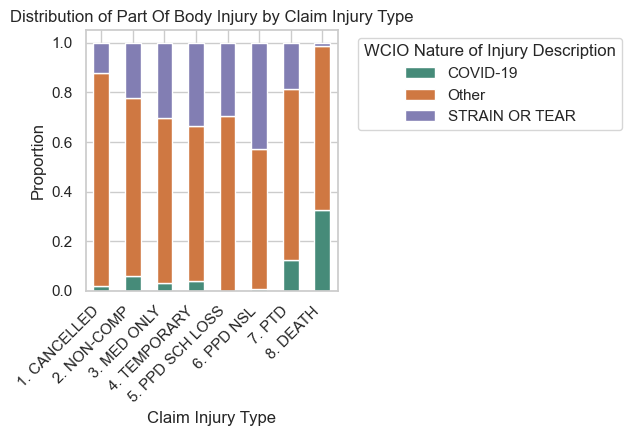

In [311]:
top_parts = df.groupby("Claim Injury Type")["WCIO Nature of Injury Description"].apply(lambda x: x.value_counts(normalize=True).nlargest(1))
top_parts = top_parts.reset_index(name="Proportion")
top_parts = top_parts.level_1.unique()
img_df = df.copy()
img_df["WCIO Nature of Injury Description"] = np.where(img_df["WCIO Nature of Injury Description"].isin(top_parts), img_df["WCIO Nature of Injury Description"], "Other")
img_df.groupby("Claim Injury Type")["WCIO Nature of Injury Description"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color = colors_3)
plt.title("Distribution of Part Of Body Injury by Claim Injury Type")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="WCIO Nature of Injury Description", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

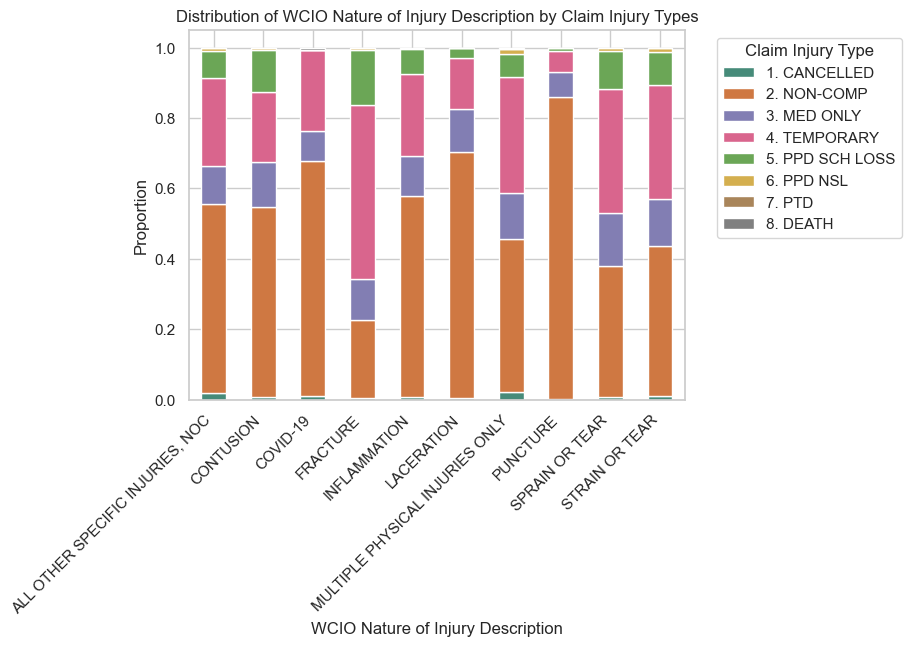

In [312]:
top10 = df["WCIO Nature of Injury Description"].value_counts().nlargest(10).index.tolist()
top10_df = df[df["WCIO Nature of Injury Description"].isin(top10)]
pd.crosstab(top10_df["WCIO Nature of Injury Description"], top10_df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color = colors_8)
plt.title("Distribution of WCIO Nature of Injury Description by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("WCIO Nature of Injury Description")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [313]:
# MISSING
df["WCIO Nature of Injury Description"].isna().sum() # 15_657
df["WCIO Nature of Injury Description"] = np.where(df["WCIO Nature of Injury Description"].isna(), "Missing", df["WCIO Nature of Injury Description"])

### WCIO Part Of Body Description

In [314]:
df["WCIO Part Of Body Description"].value_counts() # all over 30

WCIO Part Of Body Description
LOWER BACK AREA                                          51862
KNEE                                                     47903
MULTIPLE                                                 42011
SHOULDER(S)                                              37811
FINGER(S)                                                36093
HAND                                                     31388
ANKLE                                                    24928
MULTIPLE BODY PARTS (INCLUDING BODY                      22608
SOFT TISSUE                                              19703
FOOT                                                     18765
WRIST                                                    18750
LOWER ARM                                                15372
LUNGS                                                    14000
EYE(S)                                                   12975
THUMB                                                    12525
LOWER LEG                

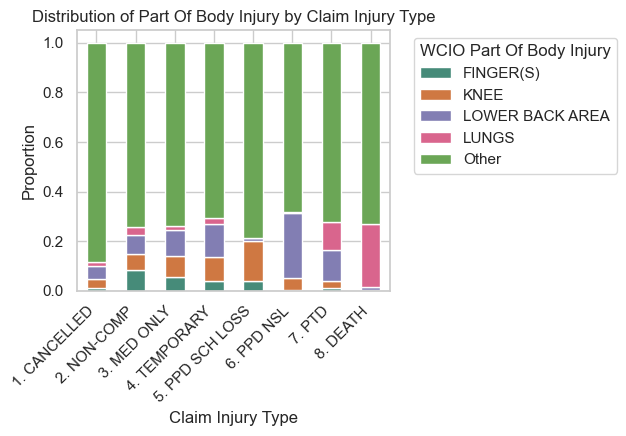

In [315]:
top_parts = df.groupby("Claim Injury Type")["WCIO Part Of Body Description"].apply(lambda x: x.value_counts(normalize=True).nlargest(1))
top_parts = top_parts.reset_index(name="Proportion")
top_parts = top_parts.level_1.unique()
img_df = df.copy()
img_df["WCIO Part Of Body Description"] = np.where(img_df["WCIO Part Of Body Description"].isin(top_parts), img_df["WCIO Part Of Body Description"], "Other")
img_df.groupby("Claim Injury Type")["WCIO Part Of Body Description"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color=colors_5)
plt.title("Distribution of Part Of Body Injury by Claim Injury Type")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="WCIO Part Of Body Injury", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

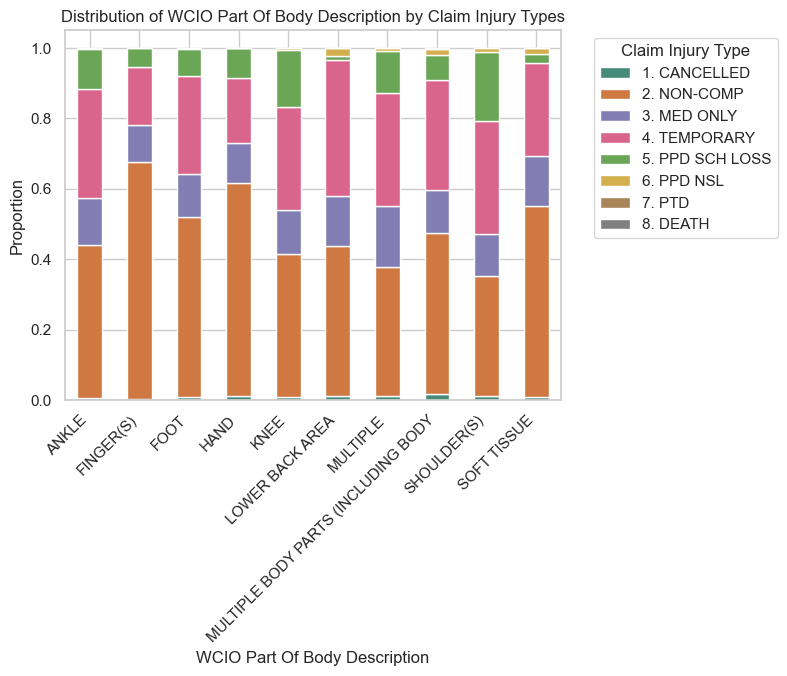

In [316]:
top10 = df["WCIO Part Of Body Description"].value_counts().nlargest(10).index.tolist()
top10_df = df[df["WCIO Part Of Body Description"].isin(top10)]
pd.crosstab(top10_df["WCIO Part Of Body Description"], top10_df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of WCIO Part Of Body Description by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("WCIO Part Of Body Description")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

In [317]:
# MISSING
df["WCIO Part Of Body Description"].isna().sum() # 17_082
df["WCIO Part Of Body Description"] = np.where(df["WCIO Part Of Body Description"].isna(), "Missing", df["WCIO Part Of Body Description"])

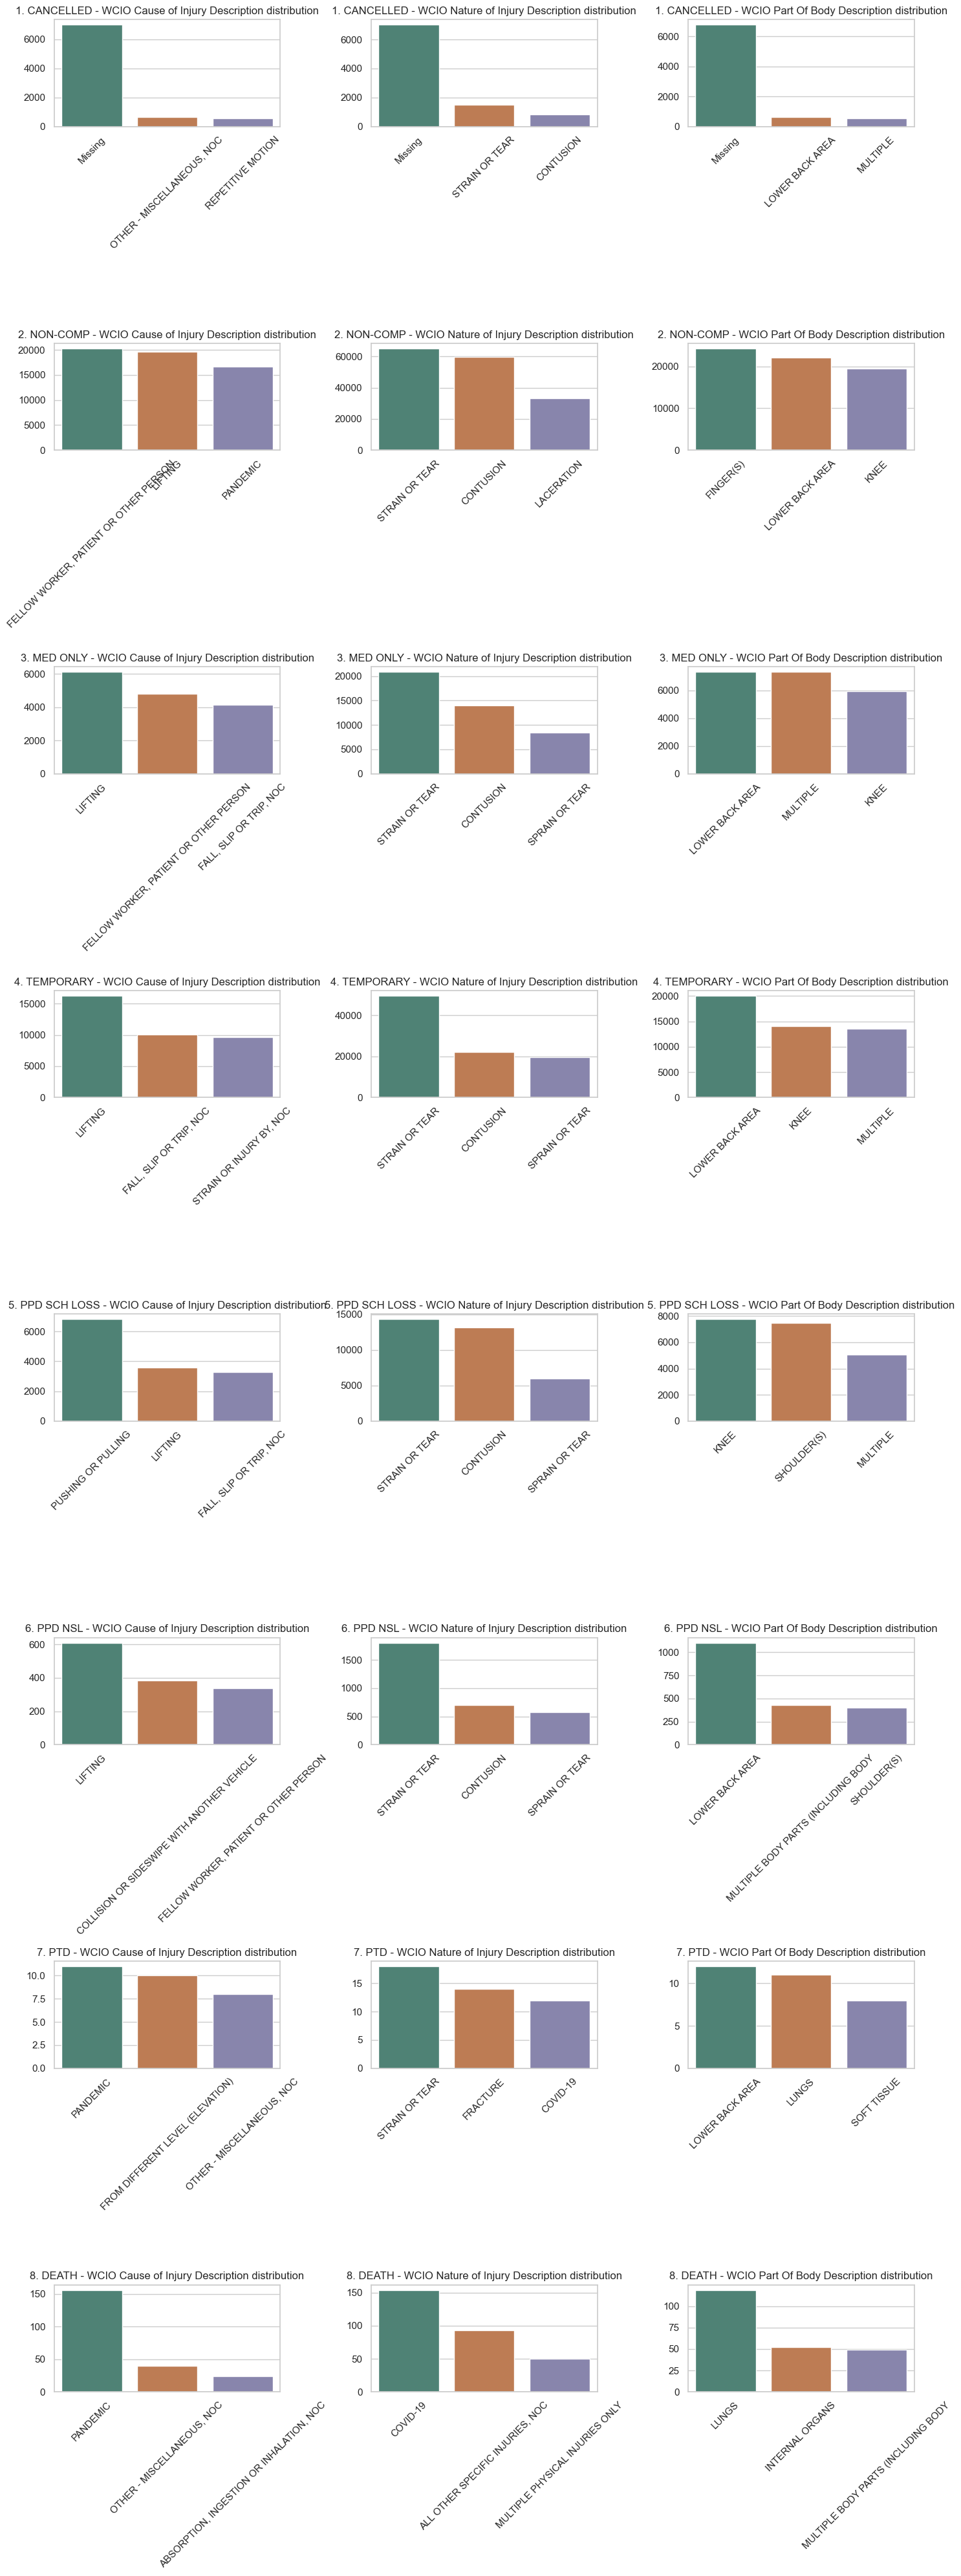

In [318]:
colors = ['#468B79', '#CF7842', '#827EB3', '#D9658D', '#6BA656', '#D4AF4F', '#A9855A', '#808080', '#5C6BC0', '#F06292']
claim_injury_types = sorted(df['Claim Injury Type'].unique())
features = ['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 40))

for i, claim_injury_type in enumerate(claim_injury_types):
    df_filtered = df[df['Claim Injury Type'] == claim_injury_type]
    for j, feature in enumerate(features):
        top_categories = df_filtered[feature].value_counts().nlargest(3)
        
        sns.barplot(
            x=top_categories.index, 
            y=top_categories.values, 
            ax=axes[i, j], 
            palette=colors[:3]
        )
        
        axes[i, j].set_title(f'{claim_injury_type} - {feature} distribution')
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### OIICS Nature of Injury Description

## Geographical data (categoricals)

### Medical Fee Region

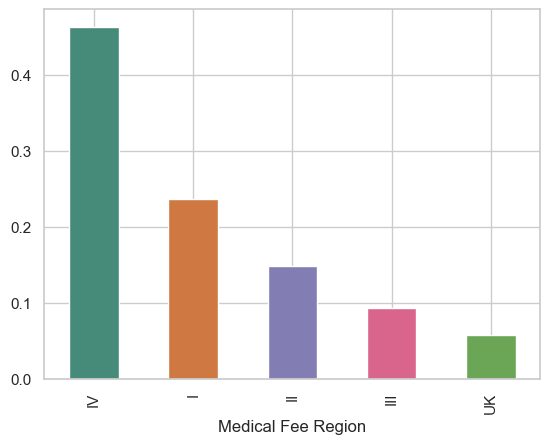

In [319]:
df["Medical Fee Region"].value_counts()
df["Medical Fee Region"].value_counts(normalize=True).plot(kind="bar",color=colors_5)
plt.show()

In [320]:
med_region = {}
for county in df["County of Injury"].unique():
    med_region[county] = df[df["County of Injury"] == county]["Medical Fee Region"].mode()[0]

In [321]:
# fill unknwons
df["Medical Fee Region"] = np.where(df["Medical Fee Region"] == "UK", df["County of Injury"].map(med_region), df["Medical Fee Region"])

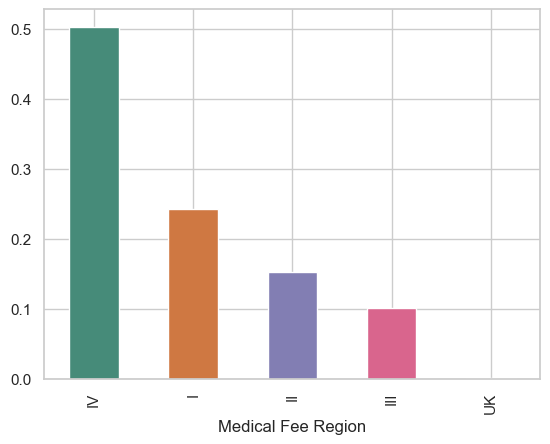

In [322]:
df["Medical Fee Region"].value_counts(normalize=True).plot(kind="bar",color=colors_5)
plt.show()

In [323]:
df["Medical Fee Region"].value_counts()

Medical Fee Region
IV     288396
I      138984
II      87522
III     58021
UK       1103
Name: count, dtype: int64

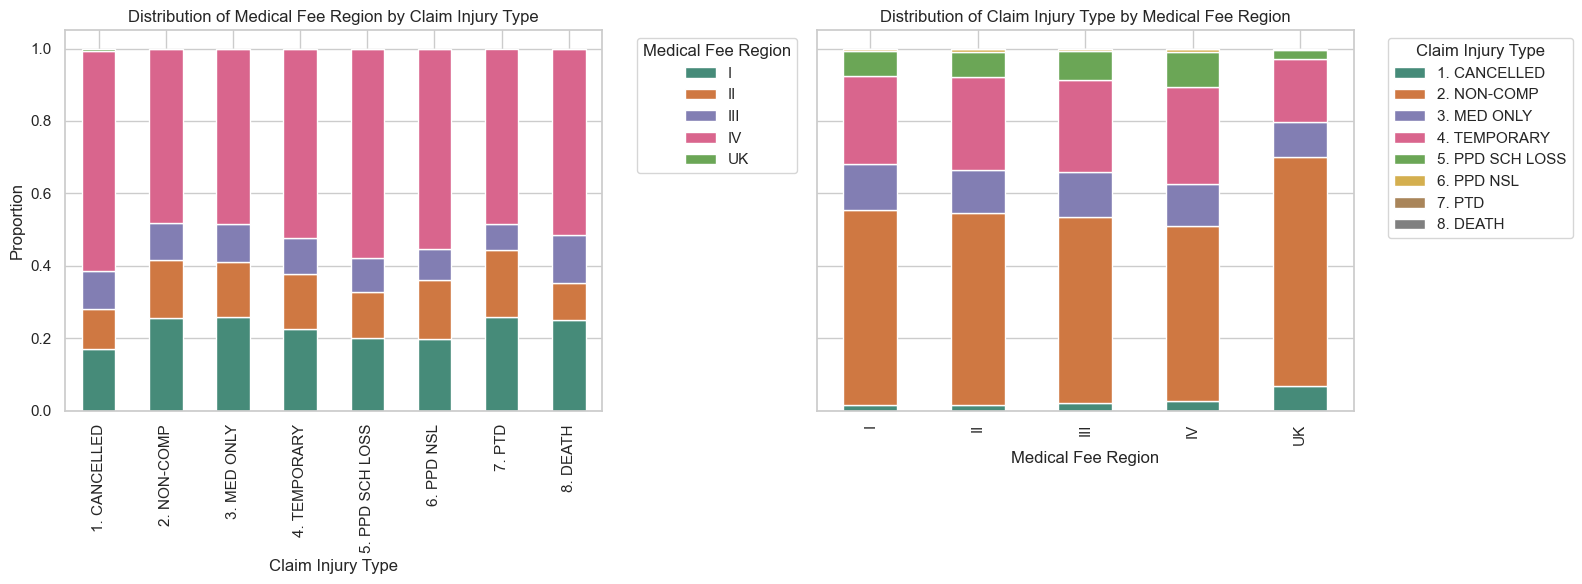

In [324]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Medical Fee Region")

### County of Injury

In [325]:
df["County of Injury"].nunique() # 63

63

In [326]:
df["County of Injury"].value_counts()
# no under 30

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64

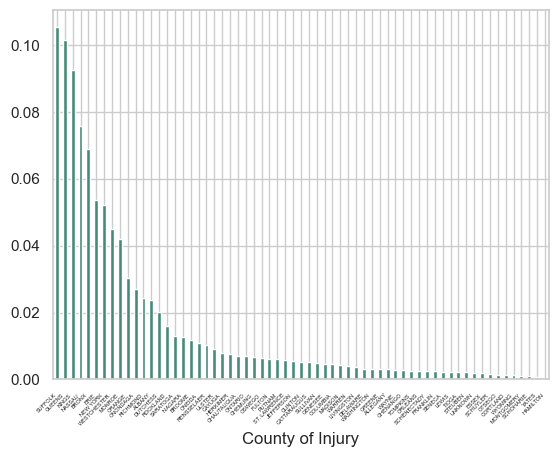

In [327]:
df["County of Injury"].value_counts(normalize=True).plot(kind="bar",color=colors_1)
plt.xticks(rotation=45, ha='right', fontsize=4)
plt.show()

In [328]:
df["County of Injury"].value_counts()

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64

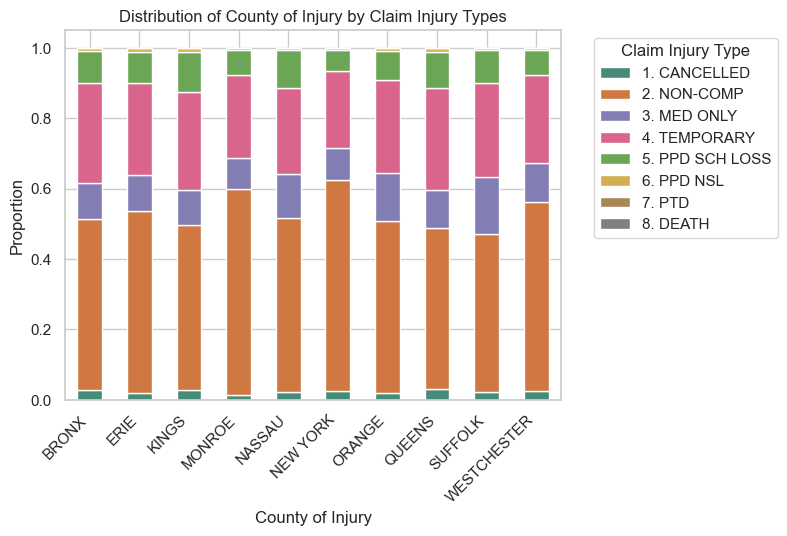

In [329]:
top_10 = df["County of Injury"].value_counts().nlargest(10).index.tolist()
top_10_df = df[df["County of Injury"].isin(top_10)]
pd.crosstab(top_10_df["County of Injury"], top_10_df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of County of Injury by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("County of Injury")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

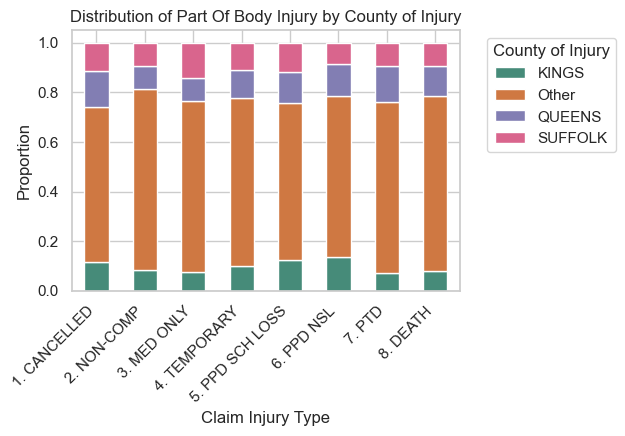

In [330]:
top_parts = df.groupby("Claim Injury Type")["County of Injury"].apply(lambda x: x.value_counts(normalize=True).nlargest(1))
top_parts = top_parts.reset_index(name="Proportion")
top_parts = top_parts.level_1.unique()
img_df = df.copy()
img_df["County of Injury"] = np.where(img_df["County of Injury"].isin(top_parts), img_df["County of Injury"], "Other")
img_df.groupby("Claim Injury Type")["County of Injury"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True,color=colors_4)
plt.title("Distribution of Part Of Body Injury by County of Injury")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="County of Injury", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [331]:
df["County of Injury"].isna().sum() # 0

0

### District Name

In [332]:
df["District Name"].nunique() # 8

8

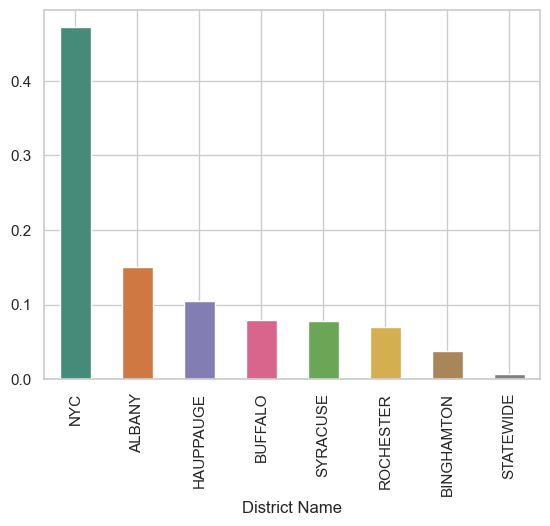

In [333]:
df["District Name"].value_counts(normalize=True).plot(kind="bar",color=colors_8)
plt.show()

In [334]:
df["District Name"].value_counts()

District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64

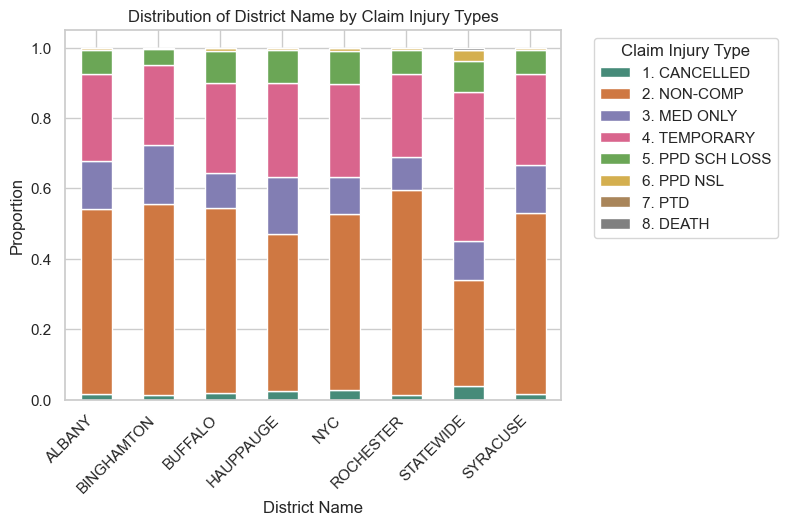

In [335]:
pd.crosstab(df["District Name"], df["Claim Injury Type"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of District Name by Claim Injury Types")
plt.ylabel("Proportion")
plt.xlabel("District Name")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

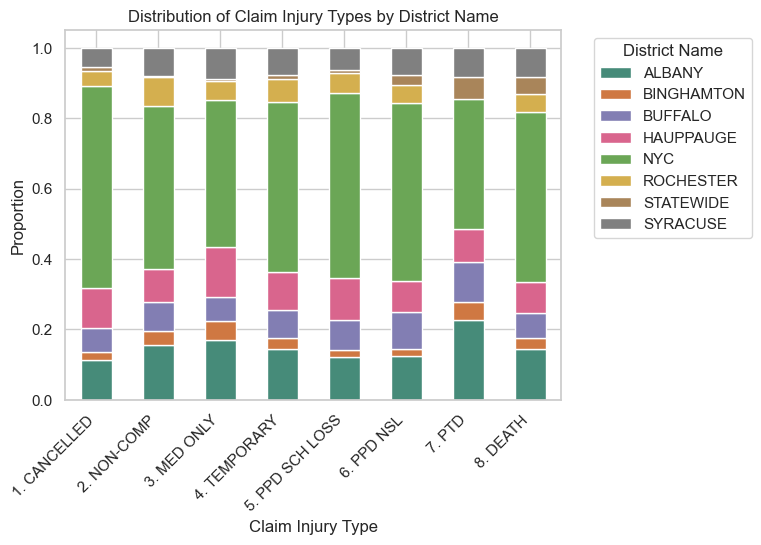

In [336]:
pd.crosstab(df["Claim Injury Type"], df["District Name"], normalize="index").plot(kind="bar", stacked=True,color=colors_8)
plt.title("Distribution of Claim Injury Types by District Name")
plt.ylabel("Proportion")
plt.xlabel("Claim Injury Type")
plt.legend(title="District Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

### Zip Code

In [337]:
df["Zip Code"].nunique() # 10_060

10060

In [338]:
df["Zip Code"].isna().sum() # 844

28637

In [339]:
df["Zip Code"] = df["Zip Code"].astype(str)
df["Zip Code"] = df["Zip Code"].fillna("missing")

In [340]:
df[(df["Zip Code"].str.isnumeric()) == False]["Zip Code"].unique()
(df[(df["Zip Code"].str.isnumeric()) == False]).shape[0] / df.shape[0] * 100 # 7% com zip incorretos

7.6669001055701305

In [341]:
df["Zip Code"] = np.where(df["Zip Code"].str.isnumeric() == False, "missing", df["Zip Code"])

In [342]:
df[(df["Zip Code"].str.isnumeric()) == False]["Zip Code"].size # 44_010

44010

In [343]:
df["Zip Code"].value_counts()

Zip Code
missing    44010
11236       3302
10940       2971
11717       2807
11434       2759
           ...  
70363          1
63050          1
03872          1
32829          1
07122          1
Name: count, Length: 8056, dtype: int64

In [344]:
underrepresented_zips = df["Zip Code"].value_counts()[df["Zip Code"].value_counts() < 30].index
len(underrepresented_zips)
# 6_583  < 30

6583

In [345]:
underrepresented_zips = df["Zip Code"].value_counts()[df["Zip Code"].value_counts() < 30].index
len(underrepresented_zips)
# 6_583  < 30

6583

In [346]:
df["Zip Code"] = np.where(df["Zip Code"].isin(underrepresented_zips), "Other", df["Zip Code"])

In [347]:
df["Zip Code"].value_counts()

Zip Code
missing    44010
Other      22435
11236       3302
10940       2971
11717       2807
           ...  
11932         30
12177         30
29588         30
08005         30
13071         30
Name: count, Length: 1474, dtype: int64

In [348]:
df["Zip Code"].nunique() # 1_474

1474

## 2.5 - Target

### Claim Injury Type

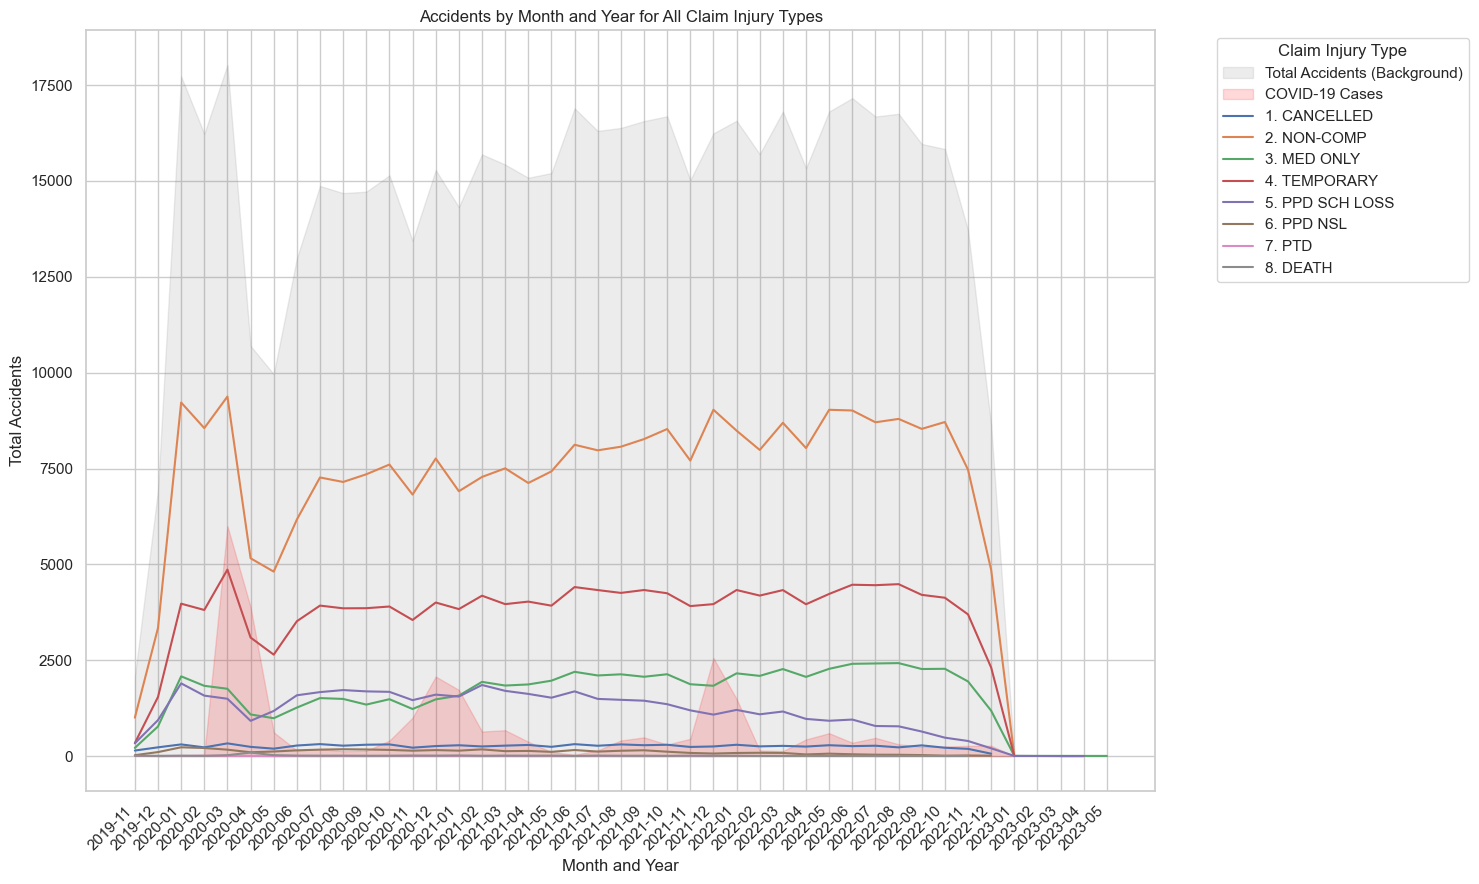

In [349]:
for i, target in enumerate(sorted(df["Claim Injury Type"].unique())):
    df[f"target_{i+1}"] = np.where(df["Claim Injury Type"] == target, 1, 0)

df[["Claim Injury Type"] + [f"target_{i}" for i in range(1, 9)]].head(10)

df.columns

df[["Claim Injury Type"] + [f"target_{i}" for i in range(1, 9)]].head(15)


# -------------------- Ordinal Encoding for Claim Injury Type

df["Claim Injury Type"].value_counts()

ordinalencoder = OrdinalEncoder(categories=[["1. CANCELLED", "2. NON-COMP", "3. MED ONLY", "4. TEMPORARY", "5. PPD SCH LOSS", "6. PPD NSL", "7. PTD", "8. DEATH"]])

ordinalencoder.categories

ordinalencoder.fit(df[["Claim Injury Type"]])

df["Claim Injury Type_encoded"] = ordinalencoder.transform(df[["Claim Injury Type"]])

df[["Claim Injury Type", "Claim Injury Type_encoded"]].head(15)


# -------------------- Analise do target contra o tempo e contra o covid

img = df.copy()
img["accident_month_year"] = img["Accident Date"].dt.to_period('M')

combined_data = {}

for target in sorted(df["Claim Injury Type"].unique()):
    img_target = img[img["Claim Injury Type"] == target]
    img_target = img_target.groupby("accident_month_year")[["target_1", "target_2", "target_3", "target_4", "target_5", "target_6", "target_7", "target_8"]].sum()

    img_target = img_target[img_target.index > '2019-10']
    img_target = img_target[img_target.index < '2023-06']

    combined_data[target] = img_target.sum(axis=1)

combined_df = pd.DataFrame(combined_data)
total_accidents = combined_df.sum(axis=1)

covid_cases = img[img["COVID-19 Indicator"] == 1].groupby("accident_month_year").size()
covid_cases = covid_cases[covid_cases.index > '2019-10']
covid_cases = covid_cases[covid_cases.index < '2023-06']

fig, ax = plt.subplots(figsize=(15, 9))
ax.fill_between(total_accidents.index.astype(str), 0, total_accidents, color='gray', alpha=0.15, label='Total Accidents (Background)')
ax.fill_between(covid_cases.index.astype(str), 0, covid_cases, color='red', alpha=0.15, label='COVID-19 Cases')
for column in combined_df.columns:
    ax.plot(combined_df.index.astype(str), combined_df[column], label=column)
plt.title("Accidents by Month and Year for All Claim Injury Types")
plt.ylabel("Total Accidents")
plt.xlabel("Month and Year")
plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#tem mais aseguir!

### Agreement Reached

### WCB Decision

# 3 - Feature Engineering

## 3.1 - Numericals

### Days from COVID

In [350]:
df["Accident Date"] = pd.to_datetime(df["Accident Date"], errors="coerce")
df["Days from COVID"] = (df["Accident Date"] - df[df["COVID-19 Indicator"] == 'Y']["Accident Date"].min()).dt.days

In [351]:
#img = df.dropna(subset=["Days from COVID"])
#plot_numerical(img, "Days from COVID")

In [352]:
#df["Days from COVID"] = np.where(df["Days from COVID"] < -200, -200, df["Days from COVID"])
#img = df.dropna(subset=["Days from COVID"])
#plot_numerical(img, "Days from COVID")

### Accident Date_assembly_gap_months

In [353]:
df["Accident Date_assembly_gap_months"] = (df["Assembly Date"] - df["Accident Date"]).dt.days/30

In [354]:
#OUTLIERS
#df[df["Accident Date_assembly_gap_months"] < 0].shape # 1407 -> negative values
#df[df["Accident Date_assembly_gap_months"] < 0].iloc[3].T
df["Accident Date"] = np.where(df["Accident Date_assembly_gap_months"] < 0, df[["C-2 Date", "C-3 Date"]].min(axis=1), df["Accident Date"])
df["Accident Date_assembly_gap_months"] = (df["Assembly Date"] - df["Accident Date"]).dt.days/30
#df[df["Accident Date_assembly_gap_months"] < 0].shape # 10
df["Assembly Date"] = np.where(df["Accident Date_assembly_gap_months"] < 0, df["Assembly Date"] + pd.DateOffset(years=1), df["Assembly Date"])
df["Accident Date_assembly_gap_months"] = (df["Assembly Date"] - df["Accident Date"]).dt.days/30
#df[df["Accident Date_assembly_gap_months"] < 0].shape # 0
df.drop(columns=["Accident Date_assembly_gap_months"], inplace=True)

### Accident Date_assembly_gap_days

<Axes: ylabel='Frequency'>

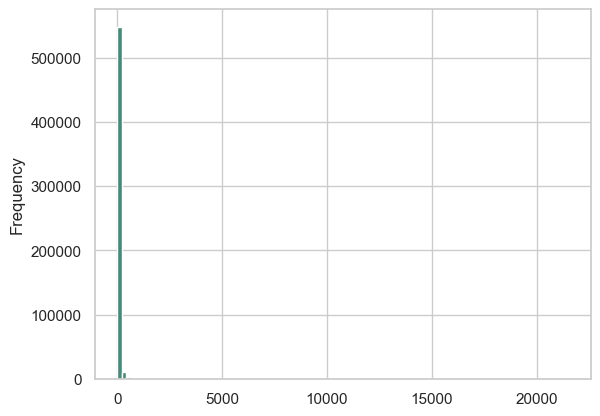

In [355]:
df["Accident Date_assembly_gap_days"] = (df["Assembly Date"] - df["Accident Date"]).dt.days
#df["Accident Date_assembly_gap_days"].describe()
df["Accident Date_assembly_gap_days"].plot(kind="hist", bins=100,color=colors_1)

3696


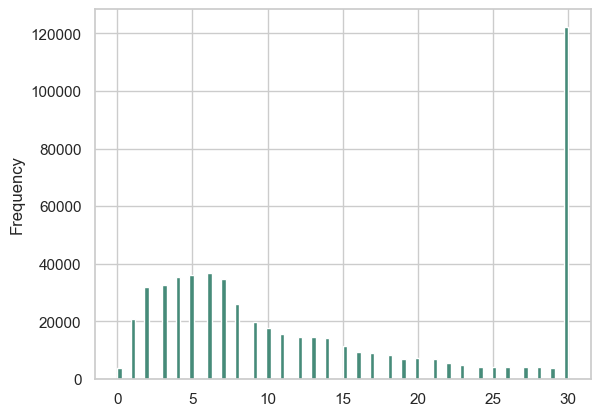

In [356]:
#OUTLIERS
df["Accident Date_assembly_gap_days"] = np.where(df["Accident Date_assembly_gap_days"] > 30, 30, df["Accident Date_assembly_gap_days"])
df["Accident Date_assembly_gap_days"].plot(kind="hist", bins=100,color=colors_1)
print(df["Accident Date_assembly_gap_days"].isna().sum())

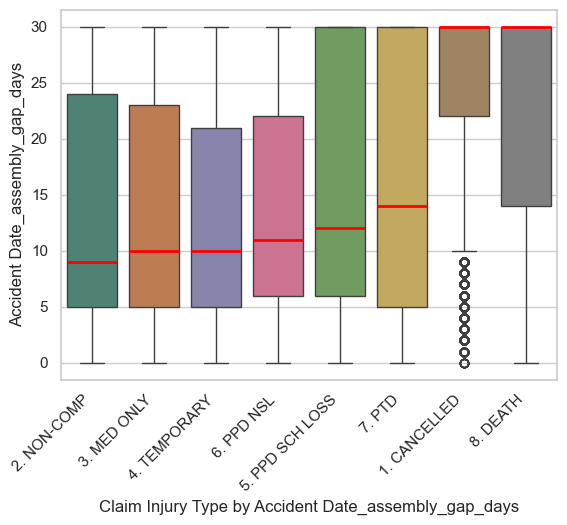

In [357]:
#IMPUTATION WITH MAX CAP(30)
img = df.copy()
img["Accident Date_assembly_gap_days"] = img["Accident Date_assembly_gap_days"].fillna(img["Accident Date_assembly_gap_days"].max())
plot_numerical_vs_target(img, "Accident Date_assembly_gap_days", "Claim Injury Type")

__Note__: 7 and 8 exhibit larger assembly-to-accident gaps.

### Accident Date_year

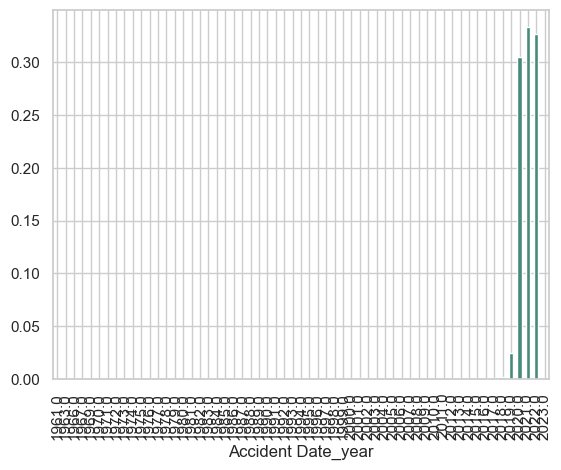

In [358]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df["Accident Date_year"] = df["Accident Date"].dt.year
df["Accident Date_year"].value_counts(normalize=True).sort_index().plot(kind="bar",color=colors_1)
plt.show()

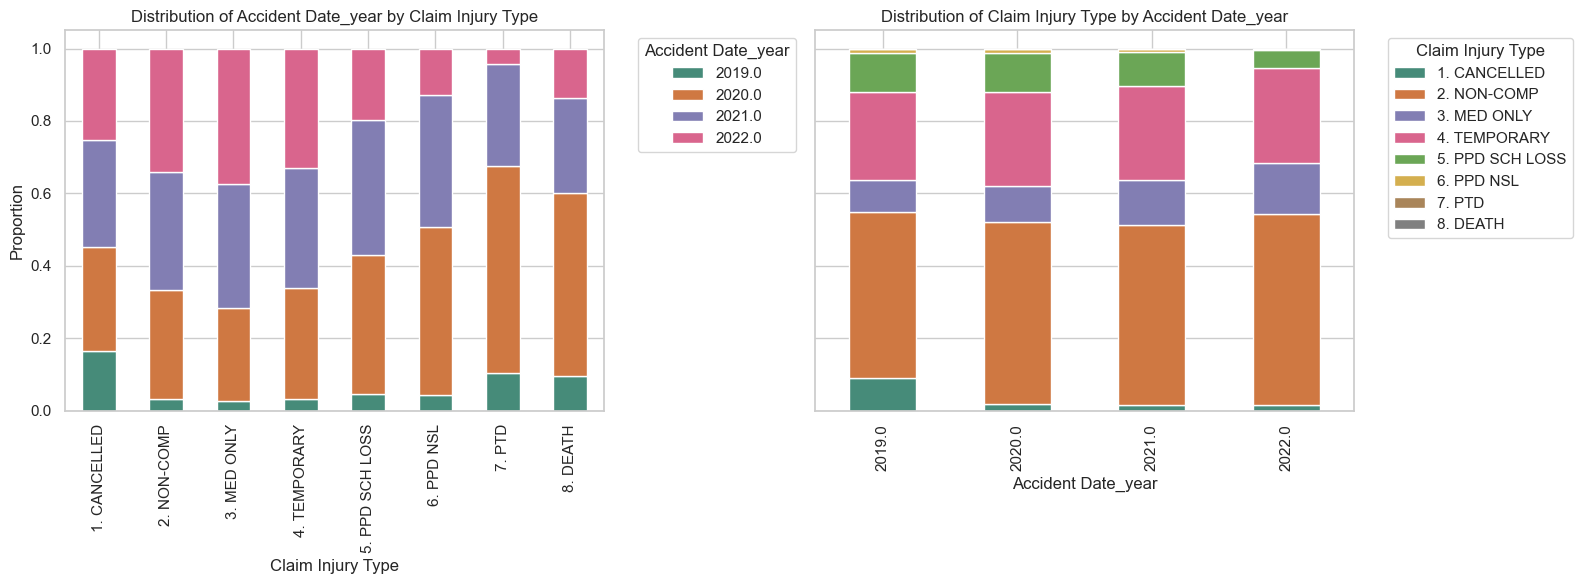

In [359]:
df["Accident Date_year"] = np.where(df["Accident Date_year"] == 2023, 2022, df["Accident Date_year"])
df["Accident Date_year"] = np.where(df["Accident Date_year"] < 2019, 2019, df["Accident Date_year"])
plot_side_by_side_crosstabs(df,'Claim Injury Type','Accident Date_year')

__Note__: 2022 experienced a decline in the more severe types of claims

### C3-C2_gap_days

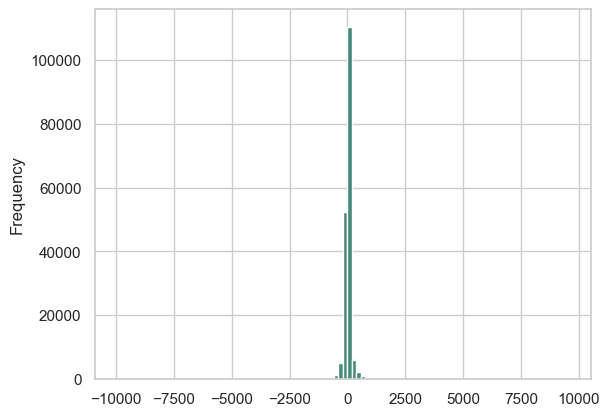

In [360]:
df["C3-C2_gap_days"] = (df["C-3 Date"] - df["C-2 Date"]).dt.days
df["C3-C2_gap_days"].describe()
df["C3-C2_gap_days"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

In [361]:
#THRESHOLDS WITH CAP ON -60 and 60 to avoid skewness
df["C3-C2_gap_days"] = np.where(df["C3-C2_gap_days"] < -60, -60, df["C3-C2_gap_days"])
df["C3-C2_gap_days"] = np.where(df["C3-C2_gap_days"] > 60, 60, df["C3-C2_gap_days"])

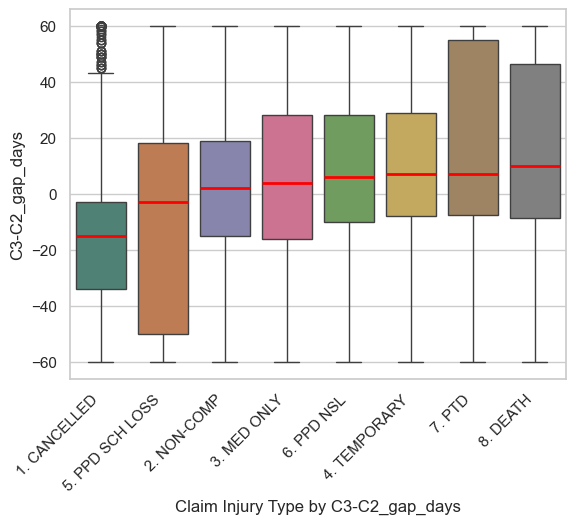

In [362]:
plot_numerical_vs_target(df,"C3-C2_gap_days","Claim Injury Type")

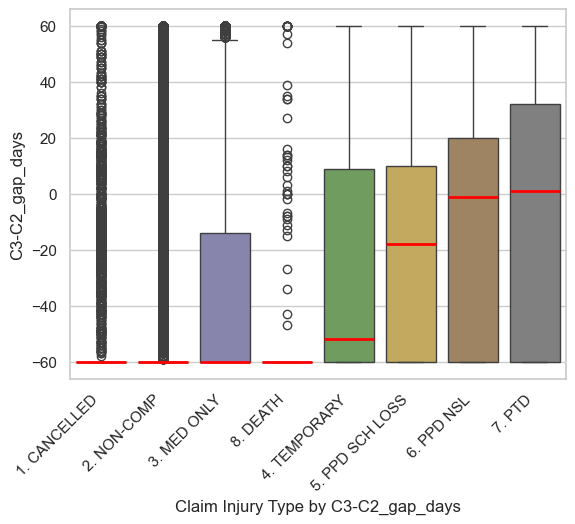

In [363]:
#df["C3-C2_gap_days"].isna().sum() # 395_003 , without c3 or c2
#IMPUTATION WITH MIN (C2 FIRST)
img = df.copy()
img["C3-C2_gap_days"] = img["C3-C2_gap_days"].fillna(img["C3-C2_gap_days"].min())
plot_numerical_vs_target(img, "C3-C2_gap_days", "Claim Injury Type")

### C2_Accident_gap_weeks

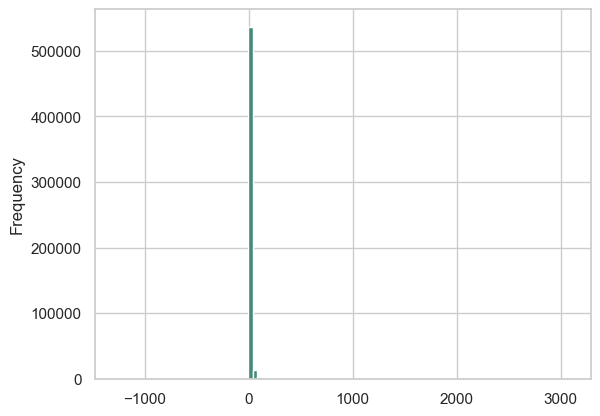

In [364]:
df["C2_Accident_gap_weeks"] = ((df["C-2 Date"] - df["Accident Date"]).dt.days/7)
#df["C2_Accident_gap_weeks"].describe()
df["C2_Accident_gap_weeks"].plot(kind="hist", bins=100,color=colors_1)
plt.show()
#df[df["C2_Accident_gap_weeks"] < 0].shape # 85

In [365]:
ex = df.copy()
ex["C-2 Date"] = np.where(ex["C2_Accident_gap_weeks"] < 0, ex["C-3 Date"], ex["C-2 Date"])
ex["C2_Accident_gap_weeks"] = ((ex["C-2 Date"] - ex["Accident Date"]).dt.days/7)
#ex[ex["C2_Accident_gap_weeks"] < 0].shape # 8
ex["C-2 Date"] = np.where(ex["C2_Accident_gap_weeks"] < 0, ex["Assembly Date"], ex["C-2 Date"])
ex["C2_Accident_gap_weeks"] = ((ex["C-2 Date"] - ex["Accident Date"]).dt.days/7)
#ex[ex["C2_Accident_gap_weeks"] < 0].shape # 0

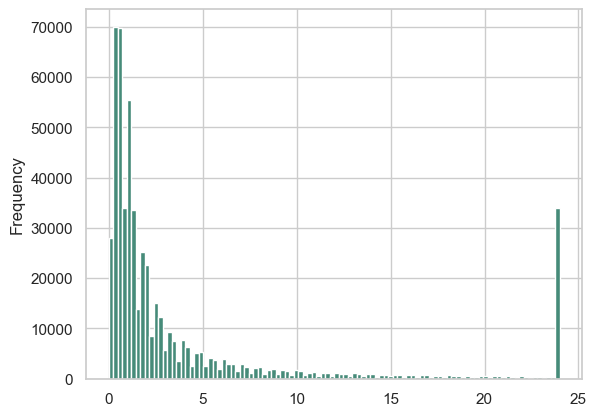

In [366]:
ex["C2_Accident_gap_weeks"] = np.where(ex["C2_Accident_gap_weeks"] < -4, -4, ex["C2_Accident_gap_weeks"])
ex["C2_Accident_gap_weeks"] = np.where(ex["C2_Accident_gap_weeks"] > 24, 24, ex["C2_Accident_gap_weeks"])
ex["C2_Accident_gap_weeks"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

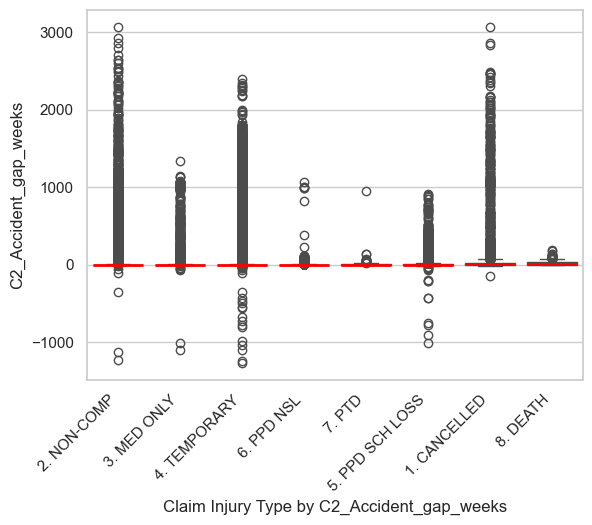

In [367]:
median_order = df.groupby("Claim Injury Type")["C2_Accident_gap_weeks"].median().sort_values().index
ax = sns.boxplot(x="Claim Injury Type", y="C2_Accident_gap_weeks", data=df, order=median_order)
for i, line in enumerate(ax.lines[4::6]):
    line.set_color("red")
    line.set_linewidth(2)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Claim Injury Type by C2_Accident_gap_weeks")
plt.show()

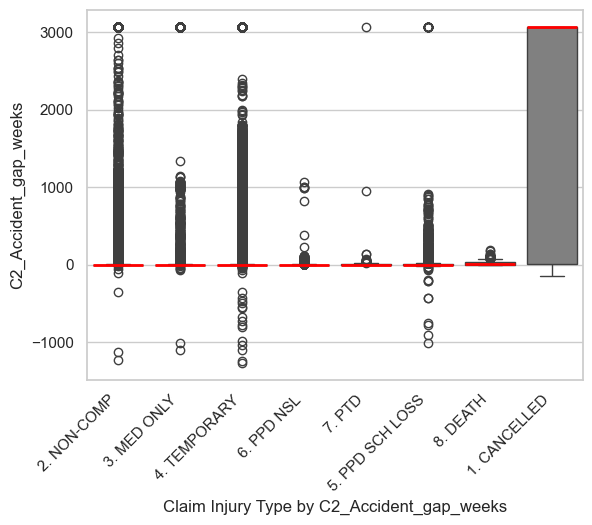

In [368]:
img = df.copy()
img["C2_Accident_gap_weeks"] = img["C2_Accident_gap_weeks"].fillna(img["C2_Accident_gap_weeks"].max())
plot_numerical_vs_target(img, "C2_Accident_gap_weeks", "Claim Injury Type")

### C3_Accident_gap_weeks

In [369]:
df["C3_Accident_gap_weeks"] = ((df["C-3 Date"] - df["Accident Date"]).dt.days/7)
#df["C3_Accident_gap_weeks"].describe()
#df["C3_Accident_gap_weeks"].plot(kind="hist", bins=100)
#plt.show()

In [370]:
#applying threshold on -4 and 24
df["C3_Accident_gap_weeks"] = np.where(df["C3_Accident_gap_weeks"] < -4, -4, df["C3_Accident_gap_weeks"])
df["C3_Accident_gap_weeks"] = np.where(df["C3_Accident_gap_weeks"] > 24, 24, df["C3_Accident_gap_weeks"])
#df["C3_Accident_gap_weeks"].plot(kind="hist", bins=100)
#plt.show()

In [371]:
"""
median_order = df.groupby("Claim Injury Type")["C3_Accident_gap_weeks"].median().sort_values().index
ax = sns.boxplot(x="Claim Injury Type", y="C3_Accident_gap_weeks", data=df, order=median_order)
for i, line in enumerate(ax.lines[4::6]):
    line.set_color("red")
    line.set_linewidth(2)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Claim Injury Type by C3_Accident_gap_weeks")
plt.show()
"""

'\nmedian_order = df.groupby("Claim Injury Type")["C3_Accident_gap_weeks"].median().sort_values().index\nax = sns.boxplot(x="Claim Injury Type", y="C3_Accident_gap_weeks", data=df, order=median_order)\nfor i, line in enumerate(ax.lines[4::6]):\n    line.set_color("red")\n    line.set_linewidth(2)\nplt.xticks(rotation=45, ha=\'right\')\nplt.xlabel("Claim Injury Type by C3_Accident_gap_weeks")\nplt.show()\n'

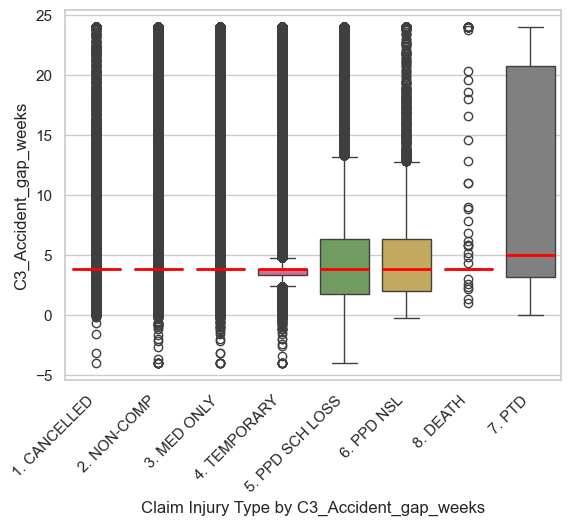

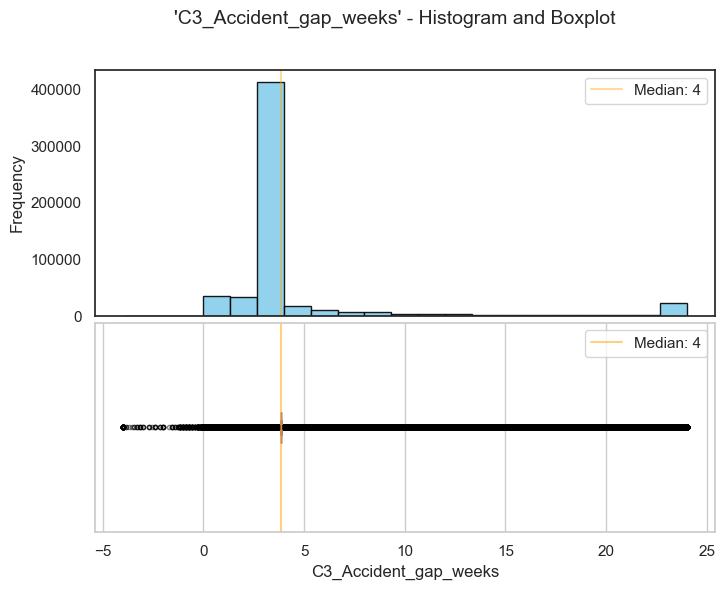

In [372]:
#df["C3_Accident_gap_weeks"].isna().sum() # 390_228
#df["C3_Accident_gap_weeks"].isna().sum() / df.shape[0] # 0.67
#applying imputation with max of gap
df_copy = df.copy()
df_copy["C3_Accident_gap_weeks"] = df_copy["C3_Accident_gap_weeks"].fillna(df_copy["C3_Accident_gap_weeks"].median())
plot_numerical_vs_target(df_copy, "C3_Accident_gap_weeks", "Claim Injury Type")
plot_numerical(df_copy, "C3_Accident_gap_weeks")

### Hearing_C3 gap months

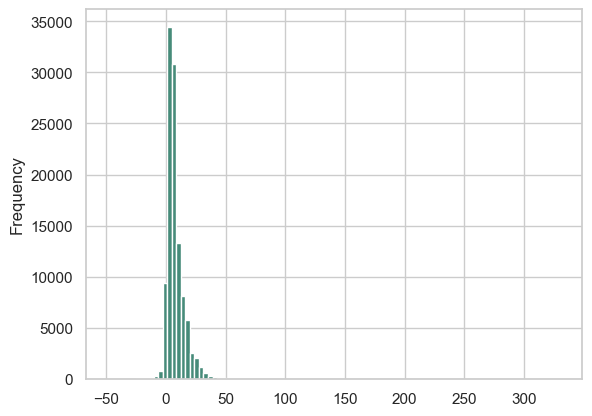

In [373]:
df["Hearing_C3 gap_months"] = ((df["First Hearing Date"].dt.year - df["C-3 Date"].dt.year) * 12 + (df["First Hearing Date"].dt.month - df["C-3 Date"].dt.month))
#df["Hearing_C3 gap_months"].describe()
#df[df["Hearing_C3 gap_months"] < 0].shape # 2762
df["Hearing_C3 gap_months"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

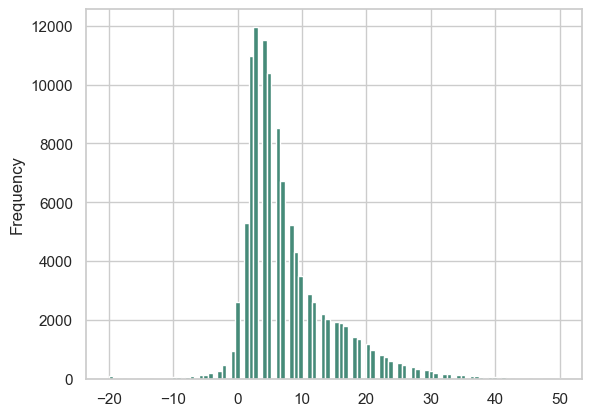

In [374]:
#applying threshold on -20 and 50
df["Hearing_C3 gap_months"] = np.where(df["Hearing_C3 gap_months"] > 50, 50, df["Hearing_C3 gap_months"])
df["Hearing_C3 gap_months"] = np.where(df["Hearing_C3 gap_months"] < -20, -20, df["Hearing_C3 gap_months"])
df["Hearing_C3 gap_months"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

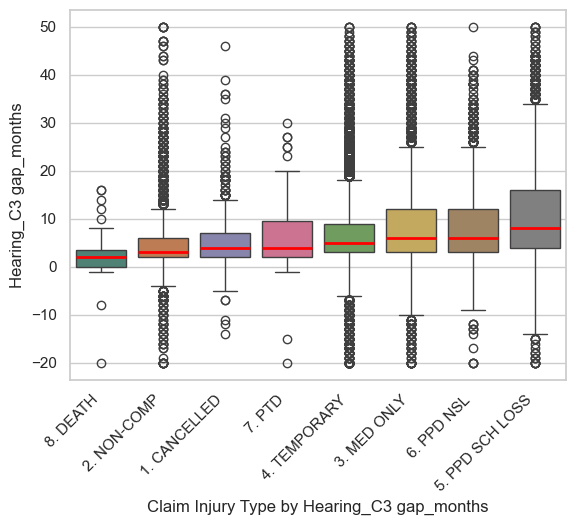

In [375]:
plot_numerical_vs_target(df,"Hearing_C3 gap_months","Claim Injury Type")

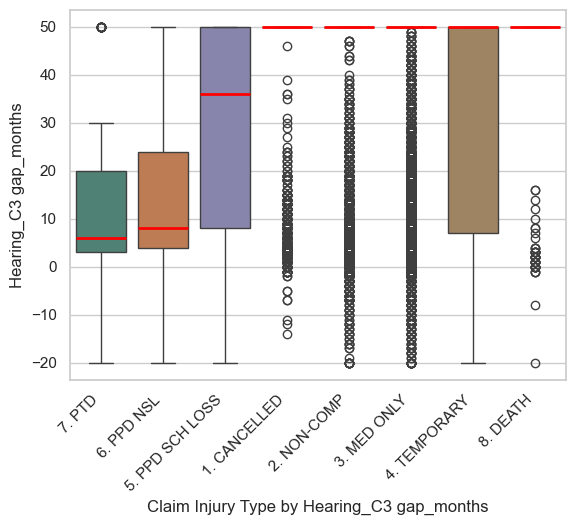

In [376]:
#df["Hearing_C3 gap_months"].isna().sum() # 464_118 , without hearing or C3
#imputation using max
img = df.copy()
img["Hearing_C3 gap_months"] = img["Hearing_C3 gap_months"].fillna(img["Hearing_C3 gap_months"].max())
plot_numerical_vs_target(img, "Hearing_C3 gap_months", "Claim Injury Type")
plt.show()

### Hearing_C2 gap months

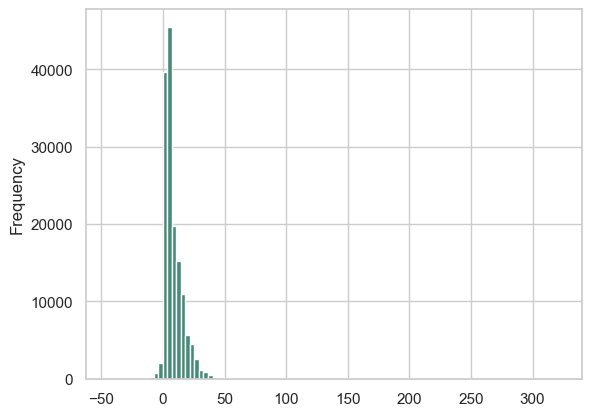

In [377]:
df["Hearing_C2 gap_months"] = ((df["First Hearing Date"].dt.year - df["C-2 Date"].dt.year) * 12 + (df["First Hearing Date"].dt.month - df["C-2 Date"].dt.month))
#df["Hearing_C2 gap_months"].describe()
#df[df["Hearing_C2 gap_months"] < 0].shape # 3100
df["Hearing_C2 gap_months"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

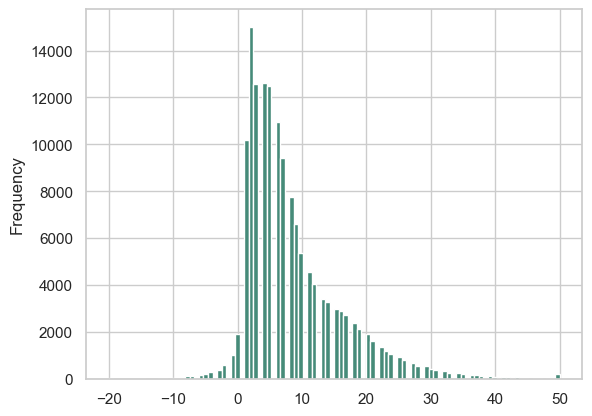

In [378]:
#applying thresholds on -20 and 50
df["Hearing_C2 gap_months"] = np.where(df["Hearing_C2 gap_months"] > 50, 50, df["Hearing_C2 gap_months"])
df["Hearing_C2 gap_months"] = np.where(df["Hearing_C2 gap_months"] < -20, -20, df["Hearing_C2 gap_months"])
df["Hearing_C2 gap_months"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

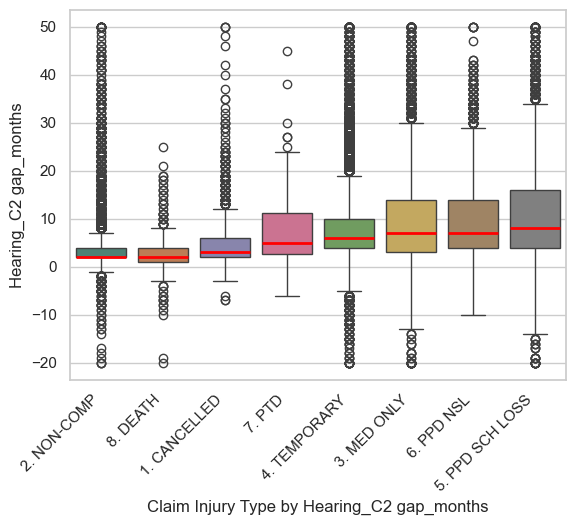

In [379]:
plot_numerical_vs_target(df,"Hearing_C2 gap_months","Claim Injury Type")

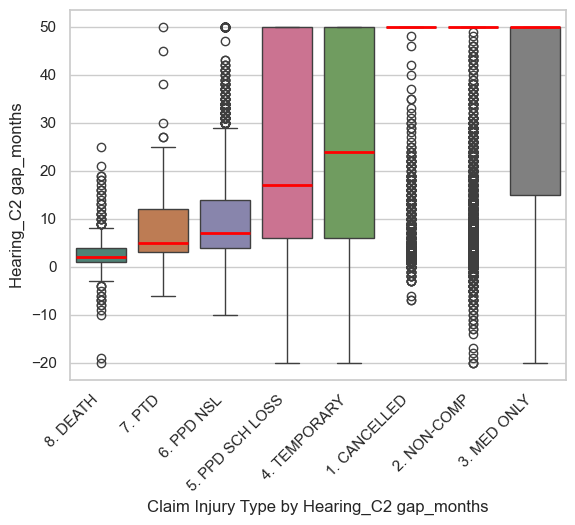

In [380]:
#df["Hearing_C2 gap_months"].isna().sum() # 424_111 , without hearing or C2
#imputation with MAX
img = df.copy()
img["Hearing_C2 gap_months"] = img["Hearing_C2 gap_months"].fillna(img["Hearing_C2 gap_months"].max())
plot_numerical_vs_target(img, "Hearing_C2 gap_months", "Claim Injury Type")
plt.show()

### Hearing Assembly_gap_months

In [381]:
df["Hearing_assembly_gap_months"] = ((df["First Hearing Date"].dt.year - df["Assembly Date"].dt.year) * 12 + (df["First Hearing Date"].dt.month - df["Assembly Date"].dt.month))
#df["Hearing_assembly_gap_months"].describe()
#df[df["Hearing_assembly_gap_months"] < 0].shape # 7

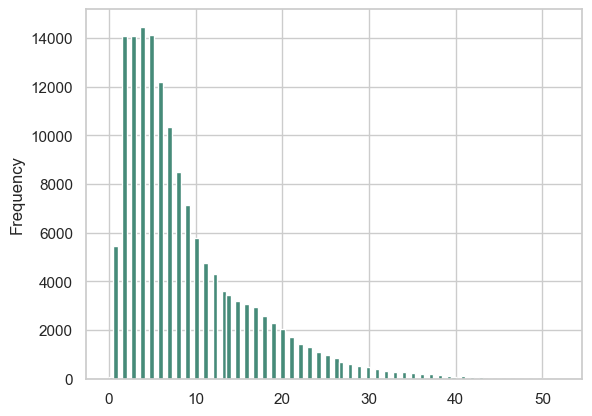

In [382]:
# OUTLIERS
#df[df["Hearing_assembly_gap_months"] < 0].iloc[0].T
df["First Hearing Date"] = np.where(df["Hearing_assembly_gap_months"] < 0, df["First Hearing Date"] + pd.DateOffset(years=1), df["First Hearing Date"])
df["Hearing_assembly_gap_months"] = ((df["First Hearing Date"].dt.year - df["Assembly Date"].dt.year) * 12 + (df["First Hearing Date"].dt.month - df["Assembly Date"].dt.month))
#df[df["Hearing_assembly_gap_months"] < 0].shape #0
#df["Hearing_assembly_gap_months"].describe()
df["Hearing_assembly_gap_months"].plot(kind="hist", bins=100,color=colors_1)
plt.show()

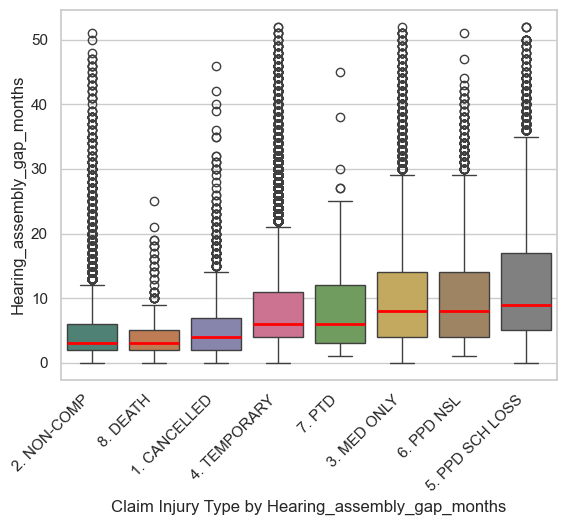

In [383]:
plot_numerical_vs_target(df,"Hearing_assembly_gap_months","Claim Injury Type")

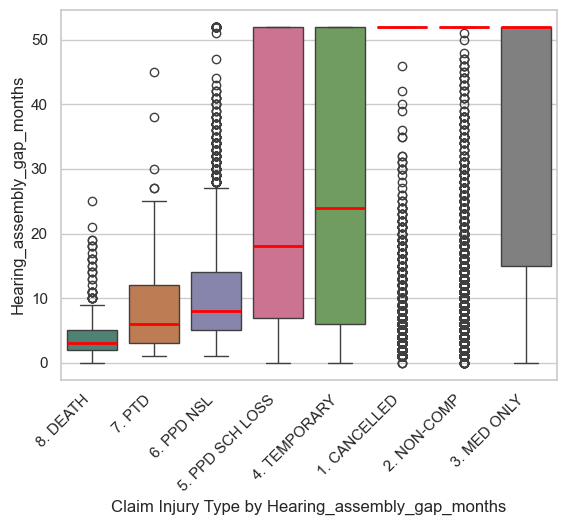

In [384]:
#df["Hearing_assembly_gap_months"].isna().sum() # 423_247 without hearing
#imputation with MAX
img = df.copy()
img["Hearing_assembly_gap_months"] = img["Hearing_assembly_gap_months"].fillna(img["Hearing_assembly_gap_months"].max())
plot_numerical_vs_target(img, "Hearing_assembly_gap_months", "Claim Injury Type")
plt.show()

### Days to Assembly

In [385]:
df["Days to Assembly"] = (df["Assembly Date"] - df["Assembly Date"].min()).dt.days

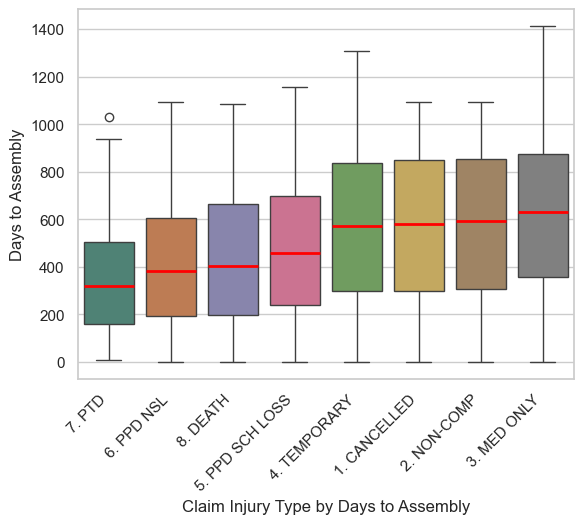

In [386]:
plot_numerical_vs_target(df,"Days to Assembly","Claim Injury Type")

### Days to First Hearing

In [387]:
df["First Hearing Date"] = pd.to_datetime(df["First Hearing Date"], errors="coerce")
df["Days to First Hearing"] = (df["First Hearing Date"] - df["First Hearing Date"].min()).dt.days

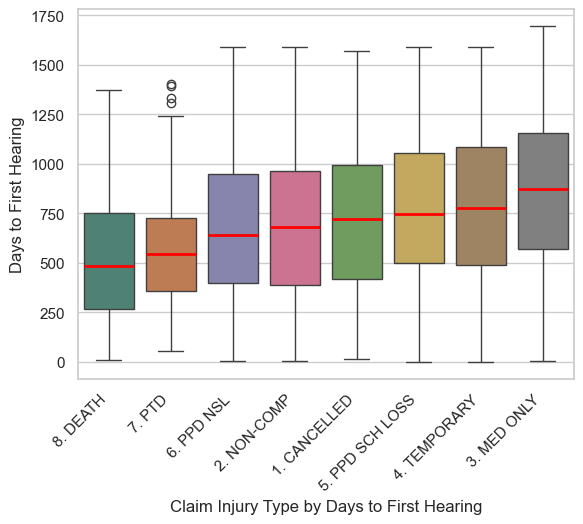

In [388]:
plot_numerical_vs_target(df,"Days to First Hearing","Claim Injury Type")

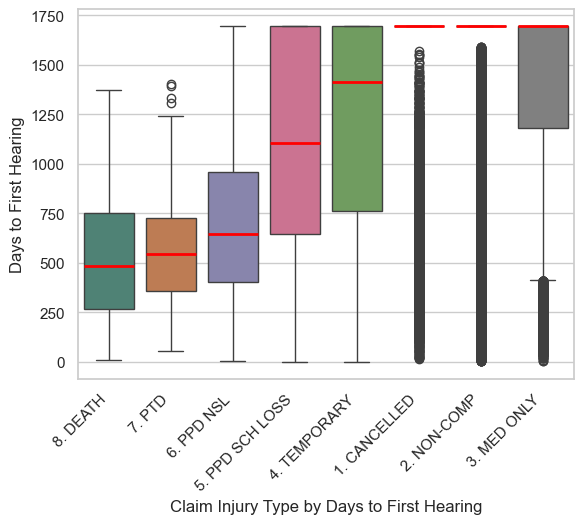

In [389]:
#df["Days to First Hearing"].isna().sum() # 423_247 sem hearing
#IMPUTATION WITH MAX:
img = df.copy()
img["Days to First Hearing"] = img["Days to First Hearing"].fillna(img["Days to First Hearing"].max())
plot_numerical_vs_target(img, "Days to First Hearing", "Claim Injury Type")
plt.show()

## 3.2 - Categorical/Booleans

### Accident Date_missing

In [390]:
df["Accident Date_missing"] = np.where(df["Accident Date"].isna(), True, False)
proportions = df["Accident Date_missing"].value_counts(normalize=True) 
print(proportions)

Accident Date_missing
False    0.993561
True     0.006439
Name: proportion, dtype: float64


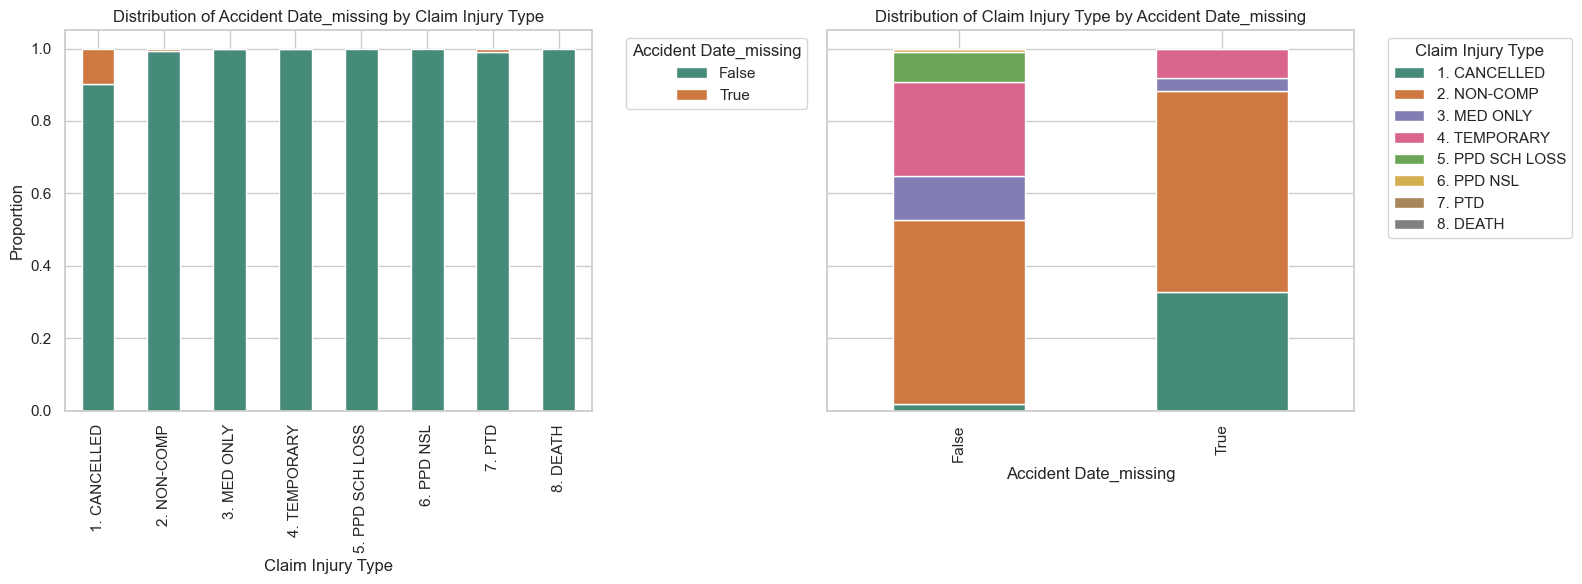

In [391]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Accident Date_missing")

__Note__: From this graph we can conclude that when the Accident date is missing, it gets cancelled

### Accident Date_weekend

In [392]:
df["Accident Date_weekday"] = df["Accident Date"].dt.weekday

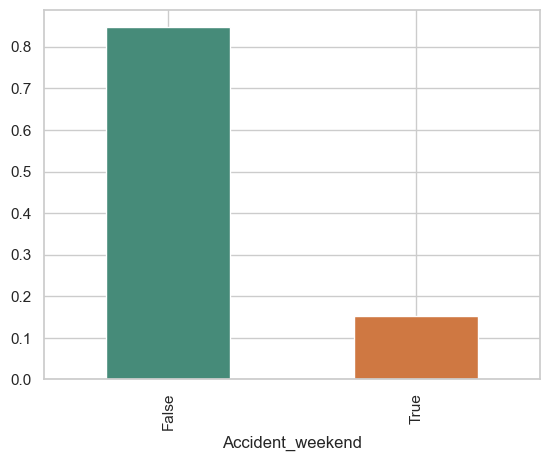

In [393]:
df["Accident_weekend"] = np.where(df["Accident Date_weekday"].isin([5, 6]), True, False)
df["Accident_weekend"].value_counts(normalize=True).plot(kind="bar",color=colors_2)
plt.show() # TRUE: 0.2 FALSE: 0.8

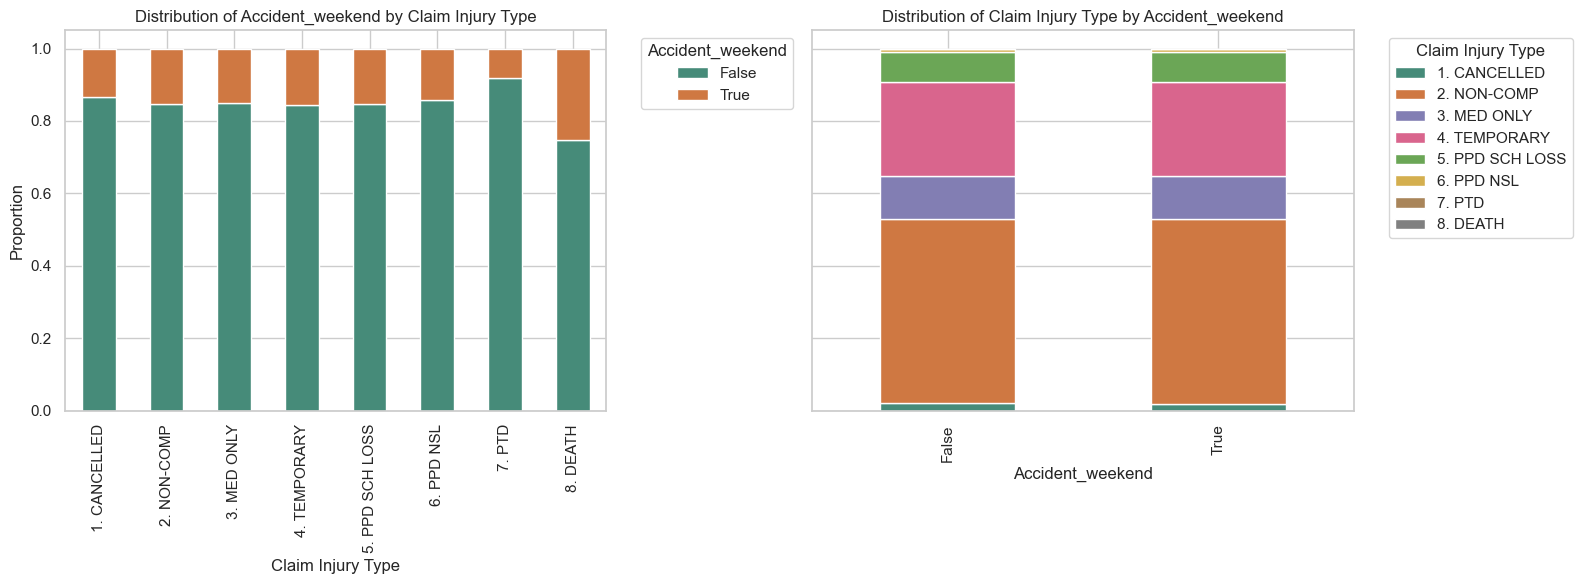

In [394]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Accident_weekend")

__Note__: From this graph we observed that the majority of the accidents happens on a week day which can be logic since it is a work policy

### Accident Date_month

3696

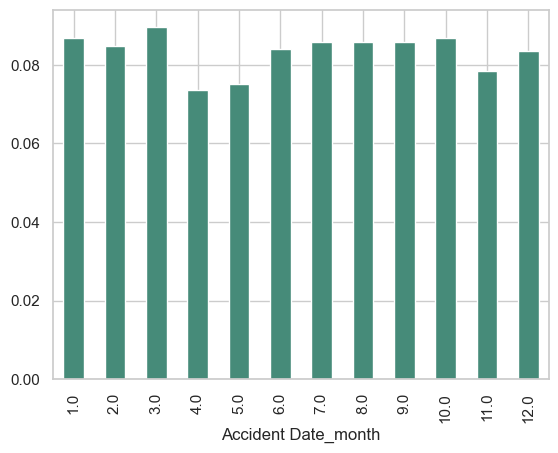

In [395]:
df["Accident Date_month"] = df["Accident Date"].dt.month
df["Accident Date_month"].value_counts(normalize=True).sort_index().plot(kind="bar",color=colors_1)# proportion by month
df["Accident Date_month"].isna().sum() # 3719 missing values

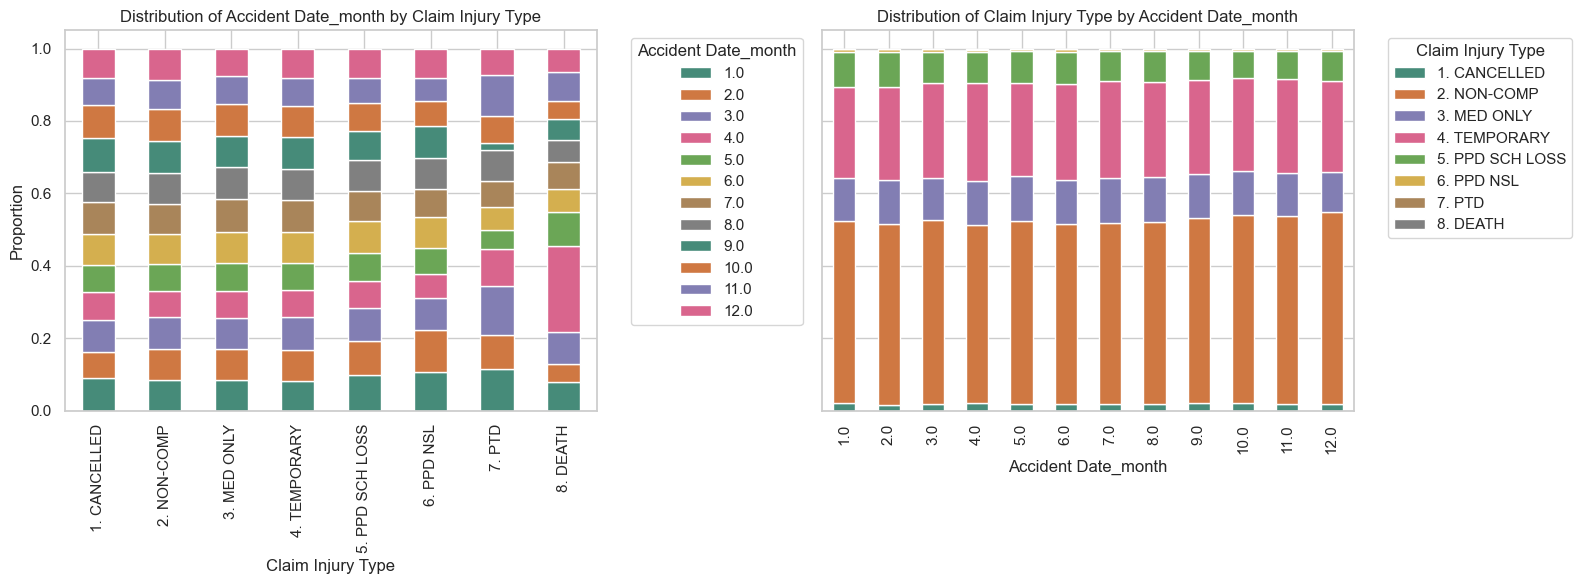

In [396]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Accident Date_month")

__Note__: In this graph we concluded that april was the month with higher deaths by proportion

### Accident Date_season

In [397]:
df["Accident Date_quarter"] = [month%12 // 3 + 1 for month in df["Accident Date_month"]]
seasons = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
df["Accident Date_season"] = df["Accident Date_quarter"].map(seasons)
#df["Accident Date_season"].value_counts(normalize=True).plot(kind="bar") checks with the literature that summer has more accidents

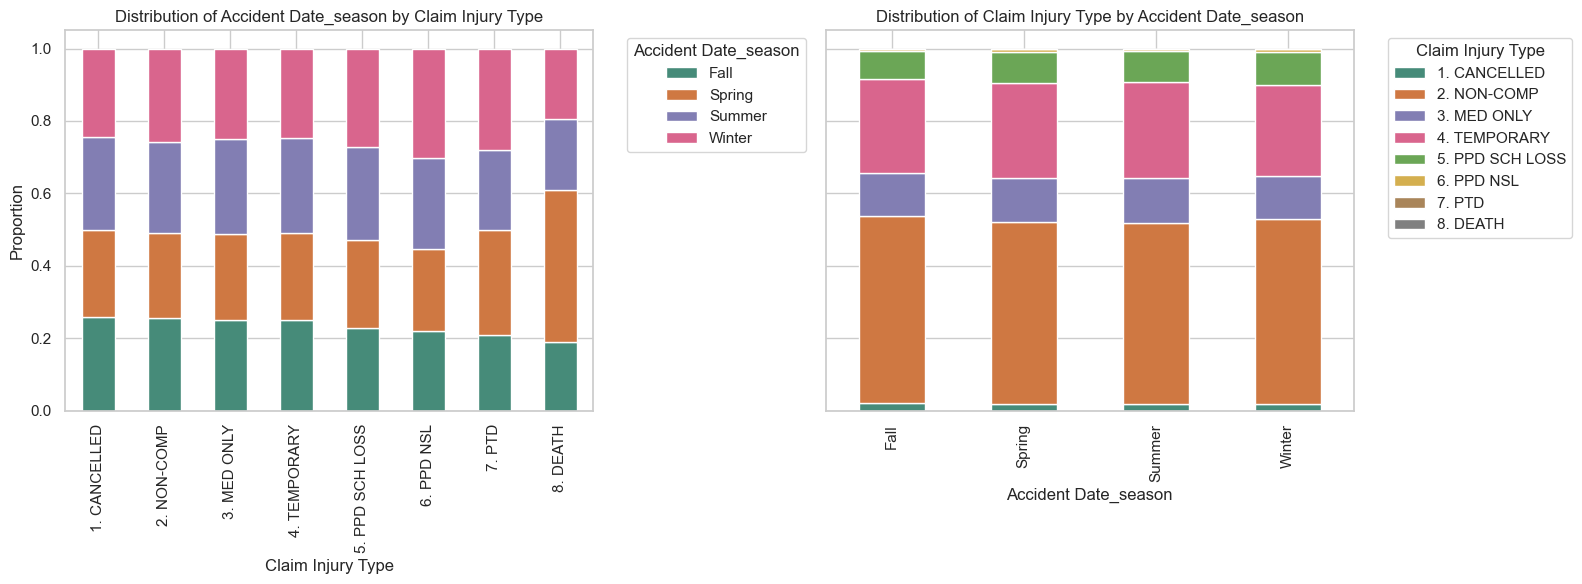

In [398]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Accident Date_season")

__Note__:
*   checks with the literature that summer has more accidents
*   Winter has less death types of claims

### C2_missing

Percentage of True values (C2_missing): 2.54%
Percentage of False values (C2_missing): 97.46%


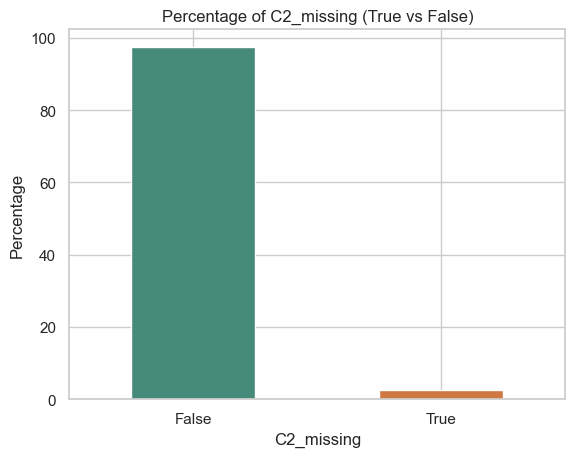

In [399]:
df["C2_missing"] = np.where(df["C-2 Date"].isna(), True, False)
# Calculate percentages for True and False
percentages = df["C2_missing"].value_counts(normalize=True) * 100

# Display the percentages
print("Percentage of True values (C2_missing): {:.2f}%".format(percentages[True]))
print("Percentage of False values (C2_missing): {:.2f}%".format(percentages[False]))

# Plot the percentages
percentages.plot(kind="bar",color=colors_2)
plt.ylabel("Percentage")
plt.title("Percentage of C2_missing (True vs False)")
plt.xticks(rotation=0)
plt.show()

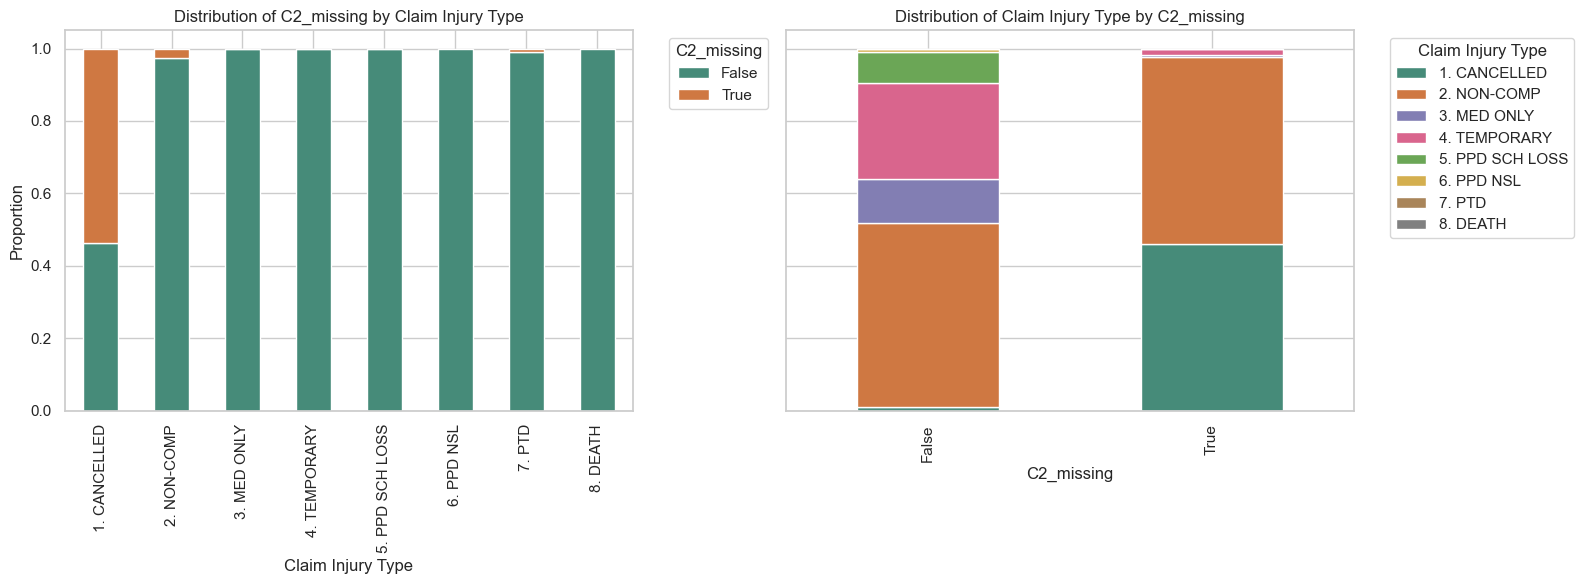

In [400]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","C2_missing")

__NOTE__: We can observe that when C2 is missing the sinister tends to be cancelled

### C3_missing

Percentage of True values (C3_missing): 67.38%
Percentage of False values (C3_missing): 32.62%


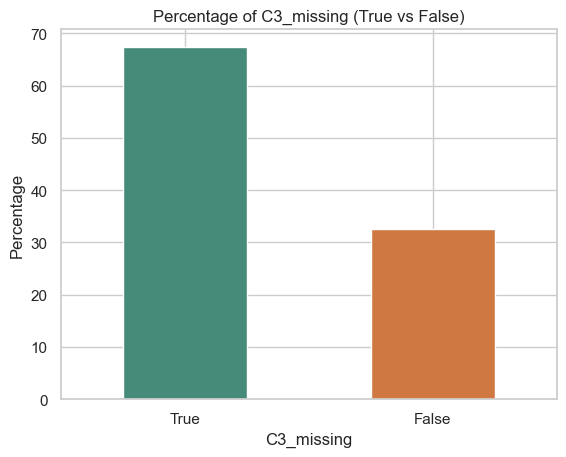

In [401]:
df["C3_missing"] = np.where(df["C-3 Date"].isna(), True, False)
percentages = df["C3_missing"].value_counts(normalize=True) * 100

# Display the percentages
print("Percentage of True values (C3_missing): {:.2f}%".format(percentages[True]))
print("Percentage of False values (C3_missing): {:.2f}%".format(percentages[False]))

# Plot the percentages
percentages.plot(kind="bar",color=colors_2)
plt.ylabel("Percentage")
plt.title("Percentage of C3_missing (True vs False)")
plt.xticks(rotation=0)
plt.show()

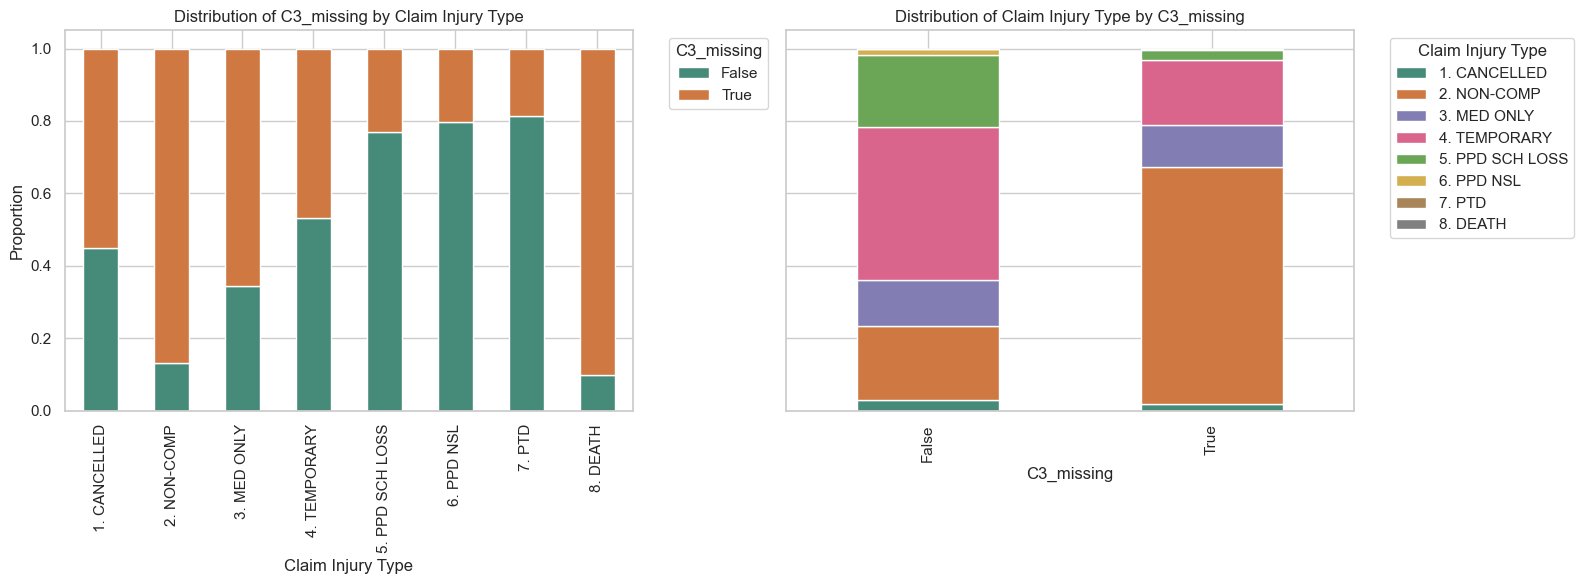

In [402]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","C3_missing")

__Note__: we can observe that when C3 is missing it has bigger impact on non-comp, med only and death and also that if C3 is missing there is a high chance to be cancelled

### Hearing Date_missing

Percentage of True values (Hearing Date_missing): 73.73%
Percentage of False values (Hearing Date_missing): 26.27%


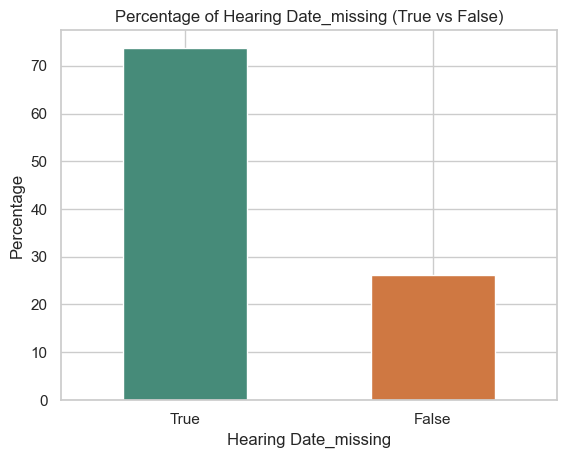

In [403]:
df["Hearing Date_missing"] = np.where(df["First Hearing Date"].isna(), True, False)
percentages = df["Hearing Date_missing"].value_counts(normalize=True) * 100

# Display the percentages
print("Percentage of True values (Hearing Date_missing): {:.2f}%".format(percentages[True]))
print("Percentage of False values (Hearing Date_missing): {:.2f}%".format(percentages[False]))

# Plot the percentages
percentages.plot(kind="bar",color=colors_2)
plt.ylabel("Percentage")
plt.title("Percentage of Hearing Date_missing (True vs False)")
plt.xticks(rotation=0)
plt.show()

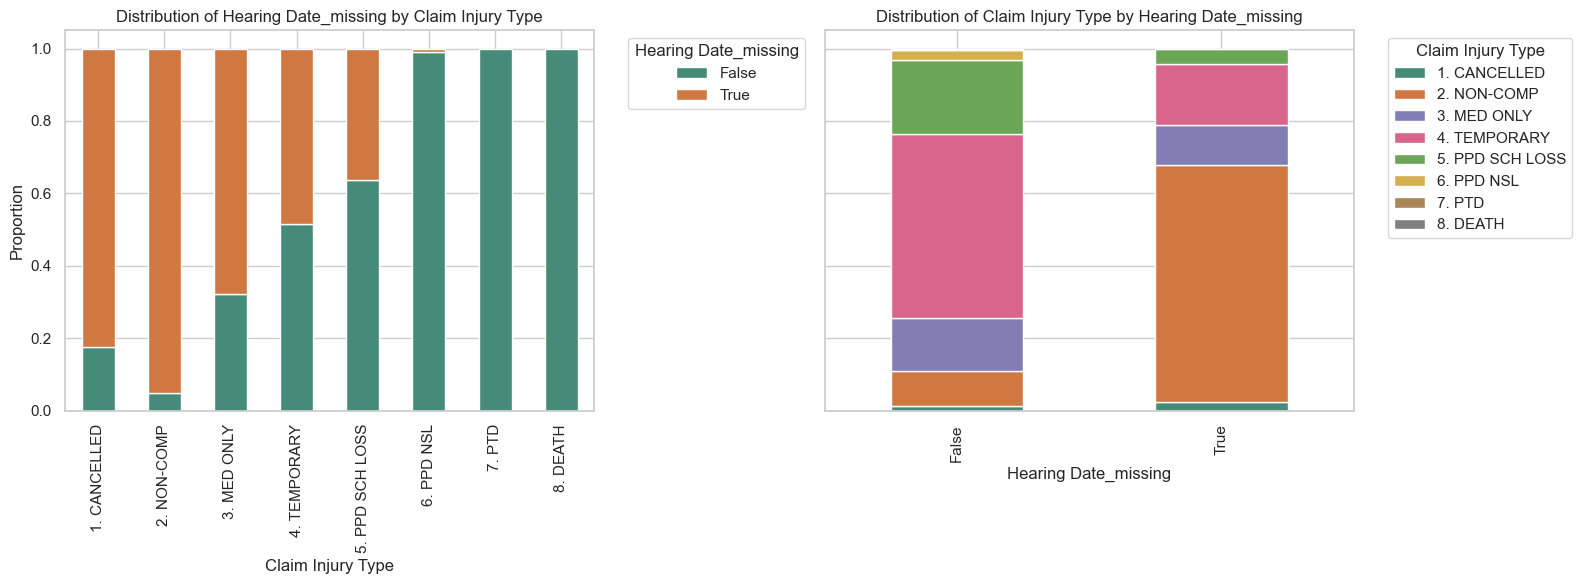

In [404]:
plot_side_by_side_crosstabs(df,"Claim Injury Type","Hearing Date_missing")

__NOTE__: High correlation between hearing date and severe claim injury types [5,6,7,8]

### Combined Injury

In [405]:
df["Combined_injury"] = df["WCIO Cause of Injury Description"] + " " + df["WCIO Nature of Injury Description"] + " " + df["WCIO Part Of Body Description"]

In [406]:
underrepresented_class = df["Combined_injury"].value_counts()[df["Combined_injury"].value_counts() < 30].index

In [407]:
df["Combined_injury"] = np.where(df["Combined_injury"].isin(underrepresented_class), "Other", df["Combined_injury"])
df["Combined_injury"].value_counts()

Combined_injury
Other                                                                                             94559
Missing Missing Missing                                                                           14764
LIFTING STRAIN OR TEAR LOWER BACK AREA                                                            13212
PANDEMIC COVID-19 LUNGS                                                                           11482
PANDEMIC COVID-19 BODY SYSTEMS AND MULTIPLE BODY SYSTEMS                                           7580
                                                                                                  ...  
USING TOOL OR MACHINERY FRACTURE FINGER(S)                                                           30
PERSON IN ACT OF A CRIME SPRAIN OR TEAR WRIST                                                        30
CONTINUAL NOISE ALL OTHER SPECIFIC INJURIES, NOC EAR(S)                                              30
REPETITIVE MOTION INFLAMMATION WRIST (S) & HAND(

In [408]:
top_5_combined_injuries = df["Combined_injury"].value_counts().head(5)
total_injuries = df["Combined_injury"].count()
top_5_percentages = (top_5_combined_injuries / total_injuries) * 100
print(top_5_percentages)

Combined_injury
Other                                                       16.472947
Missing Missing Missing                                      2.572009
LIFTING STRAIN OR TEAR LOWER BACK AREA                       2.301638
PANDEMIC COVID-19 LUNGS                                      2.000258
PANDEMIC COVID-19 BODY SYSTEMS AND MULTIPLE BODY SYSTEMS     1.320498
Name: count, dtype: float64


### Cause Part Injury

In [409]:
df["Cause_Part_Injury"] = df["WCIO Cause of Injury Description"] + " " + df["WCIO Part Of Body Description"]

In [410]:
"""
for target in sorted(df["Claim Injury Type"].unique()):
    img = df[df["Claim Injury Type"] == target]
    img["Cause_Part_Injury"].value_counts().nlargest(10).plot(kind="bar")
    plt.title(f"Top 10 Cause_Part_Injury for {target}")
    plt.xticks(rotation=45, ha='right')
    plt.show()
""" 

'\nfor target in sorted(df["Claim Injury Type"].unique()):\n    img = df[df["Claim Injury Type"] == target]\n    img["Cause_Part_Injury"].value_counts().nlargest(10).plot(kind="bar")\n    plt.title(f"Top 10 Cause_Part_Injury for {target}")\n    plt.xticks(rotation=45, ha=\'right\')\n    plt.show()\n'

In [411]:
#df["Cause_Part_Injury"].value_counts()
#(df["Cause_Part_Injury"].value_counts() < 30).sum()

In [412]:
underrepresented_class = df["Cause_Part_Injury"].value_counts()[df["Cause_Part_Injury"].value_counts() < 30].index
df["Cause_Part_Injury"] = np.where(df["Cause_Part_Injury"].isin(underrepresented_class), "Other", df["Cause_Part_Injury"])

In [413]:
top_5_cause_part_injury = df["Cause_Part_Injury"].value_counts().head(5)
total_cause_part = df["Cause_Part_Injury"].count()
top_5_c_i_percentages = (top_5_cause_part_injury / total_cause_part) * 100
print(top_5_c_i_percentages)

Cause_Part_Injury
LIFTING LOWER BACK AREA    2.832799
Missing Missing            2.572009
Other                      2.516959
PANDEMIC LUNGS             2.019421
LIFTING SHOULDER(S)        1.477633
Name: count, dtype: float64


### Nature Part Injury

In [414]:
df["Nature_Part_Injury"] = df["WCIO Nature of Injury Description"] + " " + df["WCIO Part Of Body Description"]

In [415]:
underrepresented_class = df["Nature_Part_Injury"].value_counts()[df["Nature_Part_Injury"].value_counts() < 30].index
df["Nature_Part_Injury"] = np.where(df["Nature_Part_Injury"].isin(underrepresented_class), "Other", df["Nature_Part_Injury"])

In [416]:
top_5_nature_part = df["Nature_Part_Injury"].value_counts().head(5)
total_nature_part = df["Nature_Part_Injury"].count()
top_5_n_p_percentages = (top_5_nature_part / total_nature_part) * 100
print(top_5_n_p_percentages)

Nature_Part_Injury
STRAIN OR TEAR LOWER BACK AREA    6.219579
STRAIN OR TEAR SHOULDER(S)        3.823694
STRAIN OR TEAR KNEE               2.819733
Missing Missing                   2.572183
LACERATION FINGER(S)              2.569396
Name: count, dtype: float64


### Cause Nature injury

In [417]:
df["Cause_Nature_Injury"] = df["WCIO Cause of Injury Description"] + " " + df["WCIO Nature of Injury Description"]

In [418]:
underrepresented_class = df["Cause_Nature_Injury"].value_counts()[df["Cause_Nature_Injury"].value_counts() < 30].index
df["Cause_Nature_Injury"] = np.where(df["Cause_Nature_Injury"].isin(underrepresented_class), "Other", df["Cause_Nature_Injury"])

In [419]:
top_5_cause_nature = df["Cause_Nature_Injury"].value_counts().head(5)
total_cause_nature = df["Cause_Nature_Injury"].count()
top_5_c_n_percentages = (top_5_cause_nature / total_cause_nature) * 100
print(top_5_c_n_percentages)

Cause_Nature_Injury
LIFTING STRAIN OR TEAR                              5.838934
PANDEMIC COVID-19                                   4.283430
STRAIN OR INJURY BY, NOC STRAIN OR TEAR             3.492699
FELLOW WORKER, PATIENT OR OTHER PERSON CONTUSION    2.746740
Missing Missing                                     2.716602
Name: count, dtype: float64


## 3.3 - Sin, cos and log transformations

### Accident Date_month_cos

In [420]:
df["Accident Date_month_cos"] = np.cos(2 * np.pi * df["Accident Date_month"] / 12)
#df["Accident Date_month_cos"].isna().sum() # 3719

### Accident Date_month_sim

In [421]:
df["Accident Date_month_sin"] = np.sin(2 * np.pi * df["Accident Date_month"] / 12)
df["Accident Date_month_sin"].isna().sum() # 3719

3696

### Average Weekly Wage_log

In [422]:
df["Average Weekly Wage_log"] = df["Average Weekly Wage"].apply(lambda x: np.log1p(x))
#df["Average Weekly Wage_log"].plot(kind="hist", bins=50)
#plt.show()
#df["Average Weekly Wage_log"].isna().sum() # 28_651 --> missing values

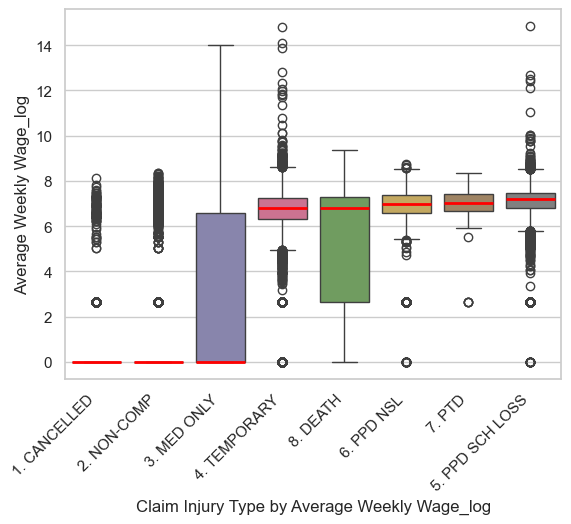

In [423]:
#imputation using the mean
img = df.copy()
img["Average Weekly Wage_log"] = img["Average Weekly Wage_log"].fillna(img["Average Weekly Wage_log"].mean())
plot_numerical_vs_target(img, "Average Weekly Wage_log", "Claim Injury Type")

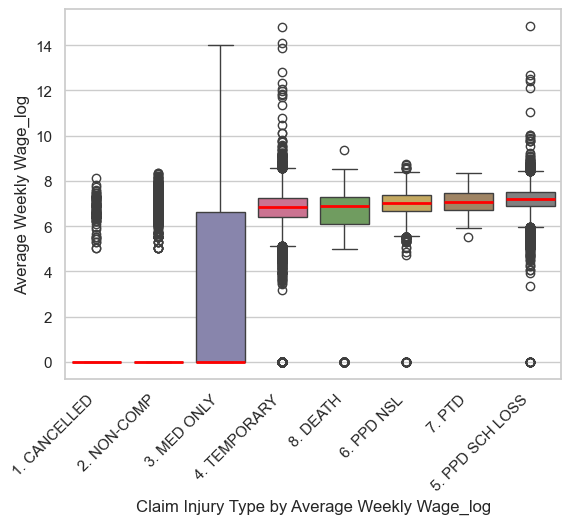

In [424]:
ex = df.copy()
plot_numerical_vs_target(df, "Average Weekly Wage_log", "Claim Injury Type")
df.drop(columns=["Average Weekly Wage"], inplace=True)

# Multivariate analysis